----
## EDA - 손민수
: 구매시각에 따른 구매금액 및 매장 별 판매량 분석

### 물품대분류 그래프

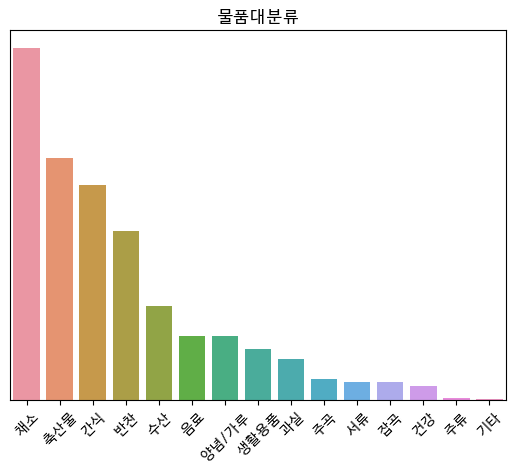

In [ ]:
sns.barplot(x = df['물품대분류'].value_counts()[df['물품대분류'].value_counts() > 10].index, y = df['물품대분류'].value_counts()[df['물품대분류'].value_counts() > 10].values)
plt.xticks(rotation = 45)
plt.title('물품대분류')
plt.yticks([])
plt.xlabel('')
plt.show()

- 물품 대분류중에서는 채소, 축산물, 간식, 반찬 순으로 물품이 제일 많이 팔리는 것으로 확인된다.

### 구매 시각별 구매금액 특징

In [ ]:
df_join['구매시각_시간'] = df_join['구매시각'].dt.hour
df_join['구매시각_분'] = df_join['구매시각'].dt.minute

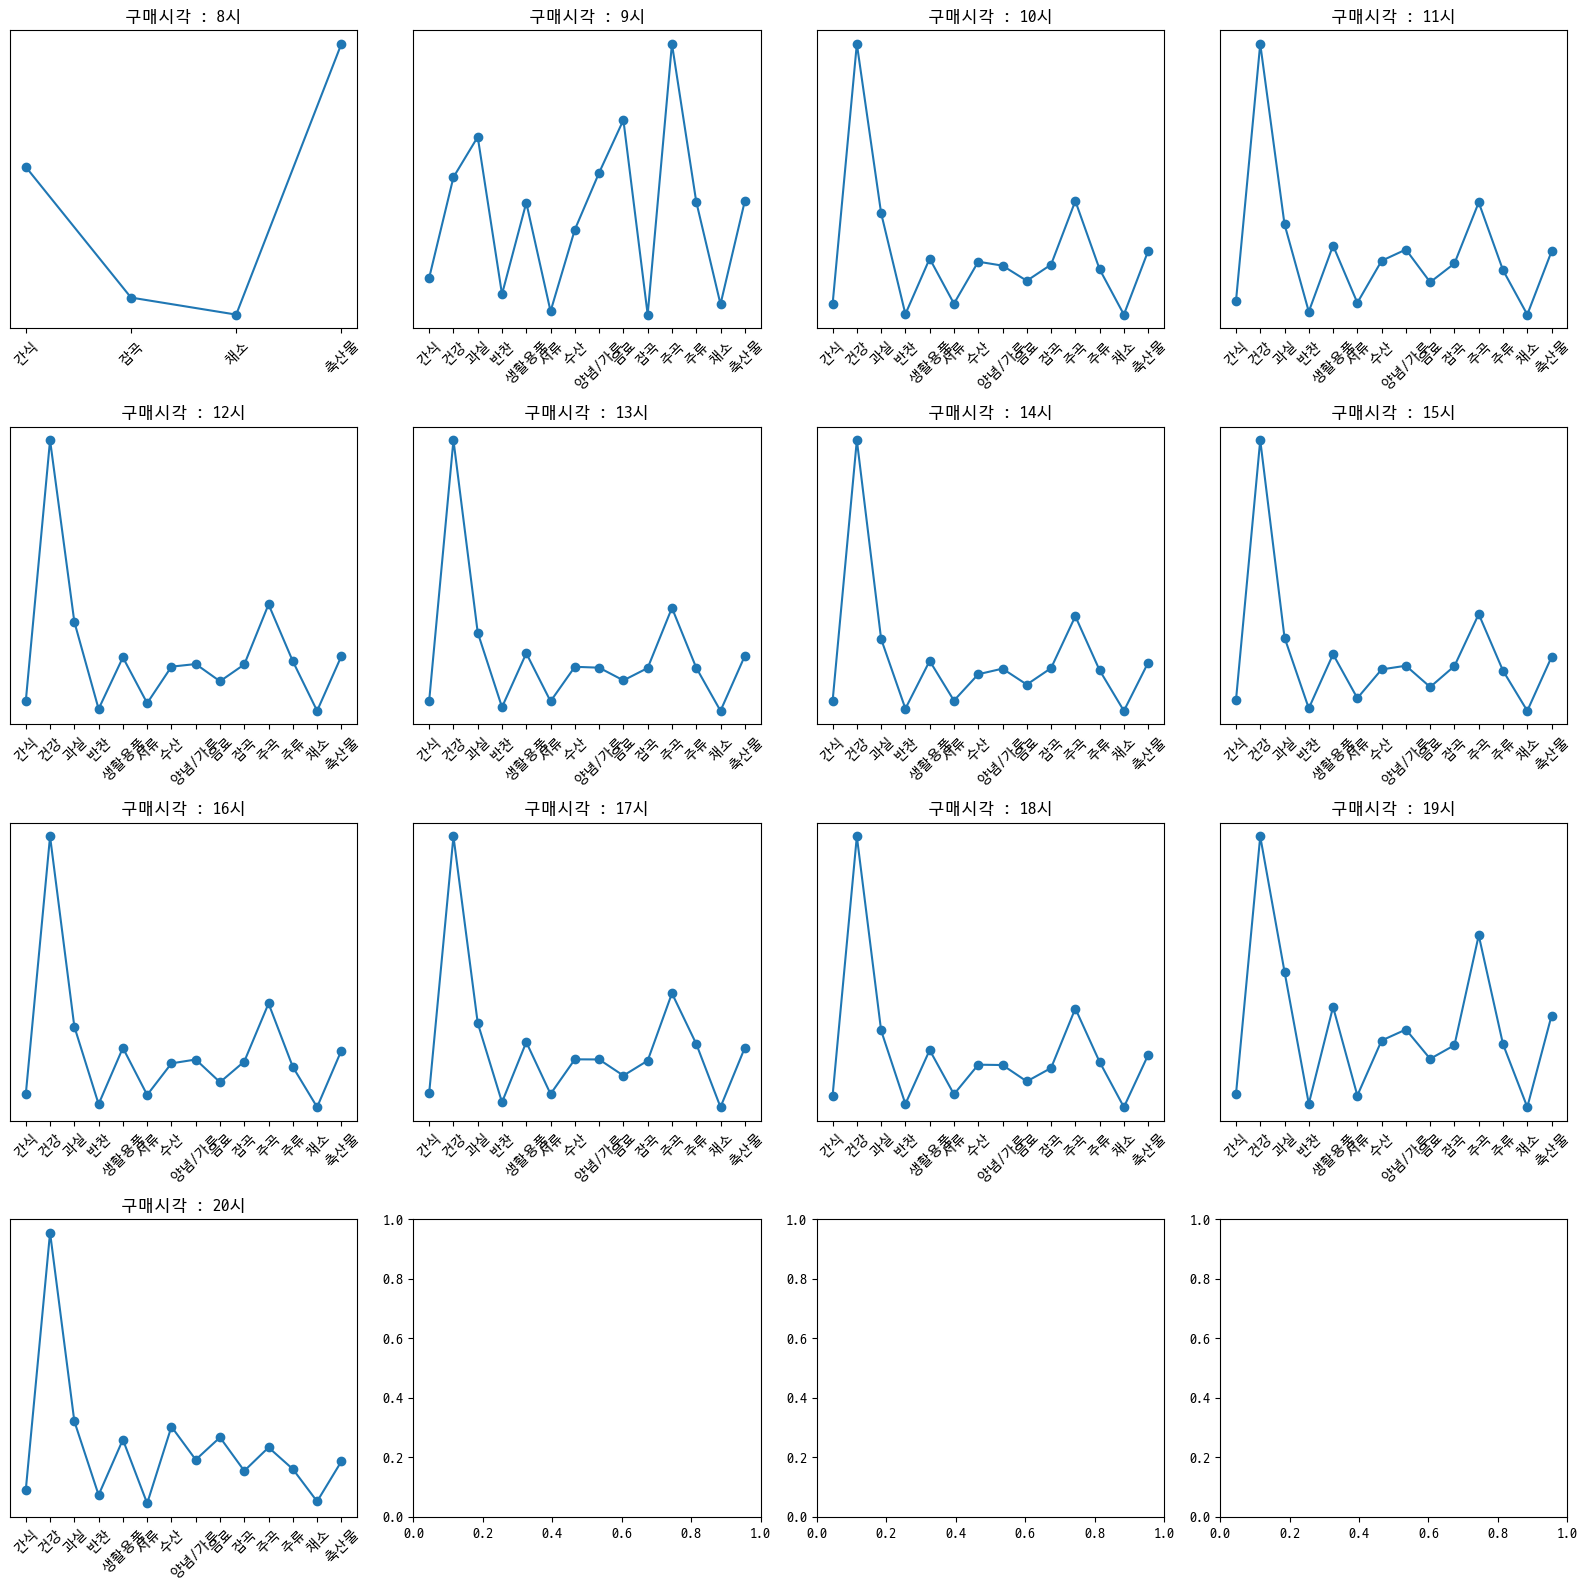

In [ ]:
df_remove_price = df_join[df_join['구매금액'] > 0][df_join[df_join['구매금액'] > 0]['반품_원거래일자'].isnull()]
df_group = df_remove_price[['구매시각_시간','물품대분류','구매금액']]

fig , axes = plt.subplots(4,4,figsize=(16,16))

for i, ax in zip(range(8,21), axes.flatten()):
    df_filtered = df_group[df_group['구매시각_시간'] == i].groupby(['물품대분류']).mean()

    ax.plot(df_filtered.index , df_filtered['구매금액'], marker = 'o')
    ax.set_title('구매시각 : {}시'.format(i))
    ax.set_xlabel('')
    ax.set_xticks(df_filtered.index)
    ax.set_xticklabels(df_filtered.index, rotation = 45)
    ax.set_yticks([])

    # for j in range(len(df_filtered)):
    #     row = df_filtered.index[j]
    #     col = df_filtered['구매금액'].values[j]
    #     plt.text(row, col, format(int(col),',d'))
plt.tight_layout()
plt.show()

- 각 시간별 판매전략을 세울 때 유용할 것으로 보인다.

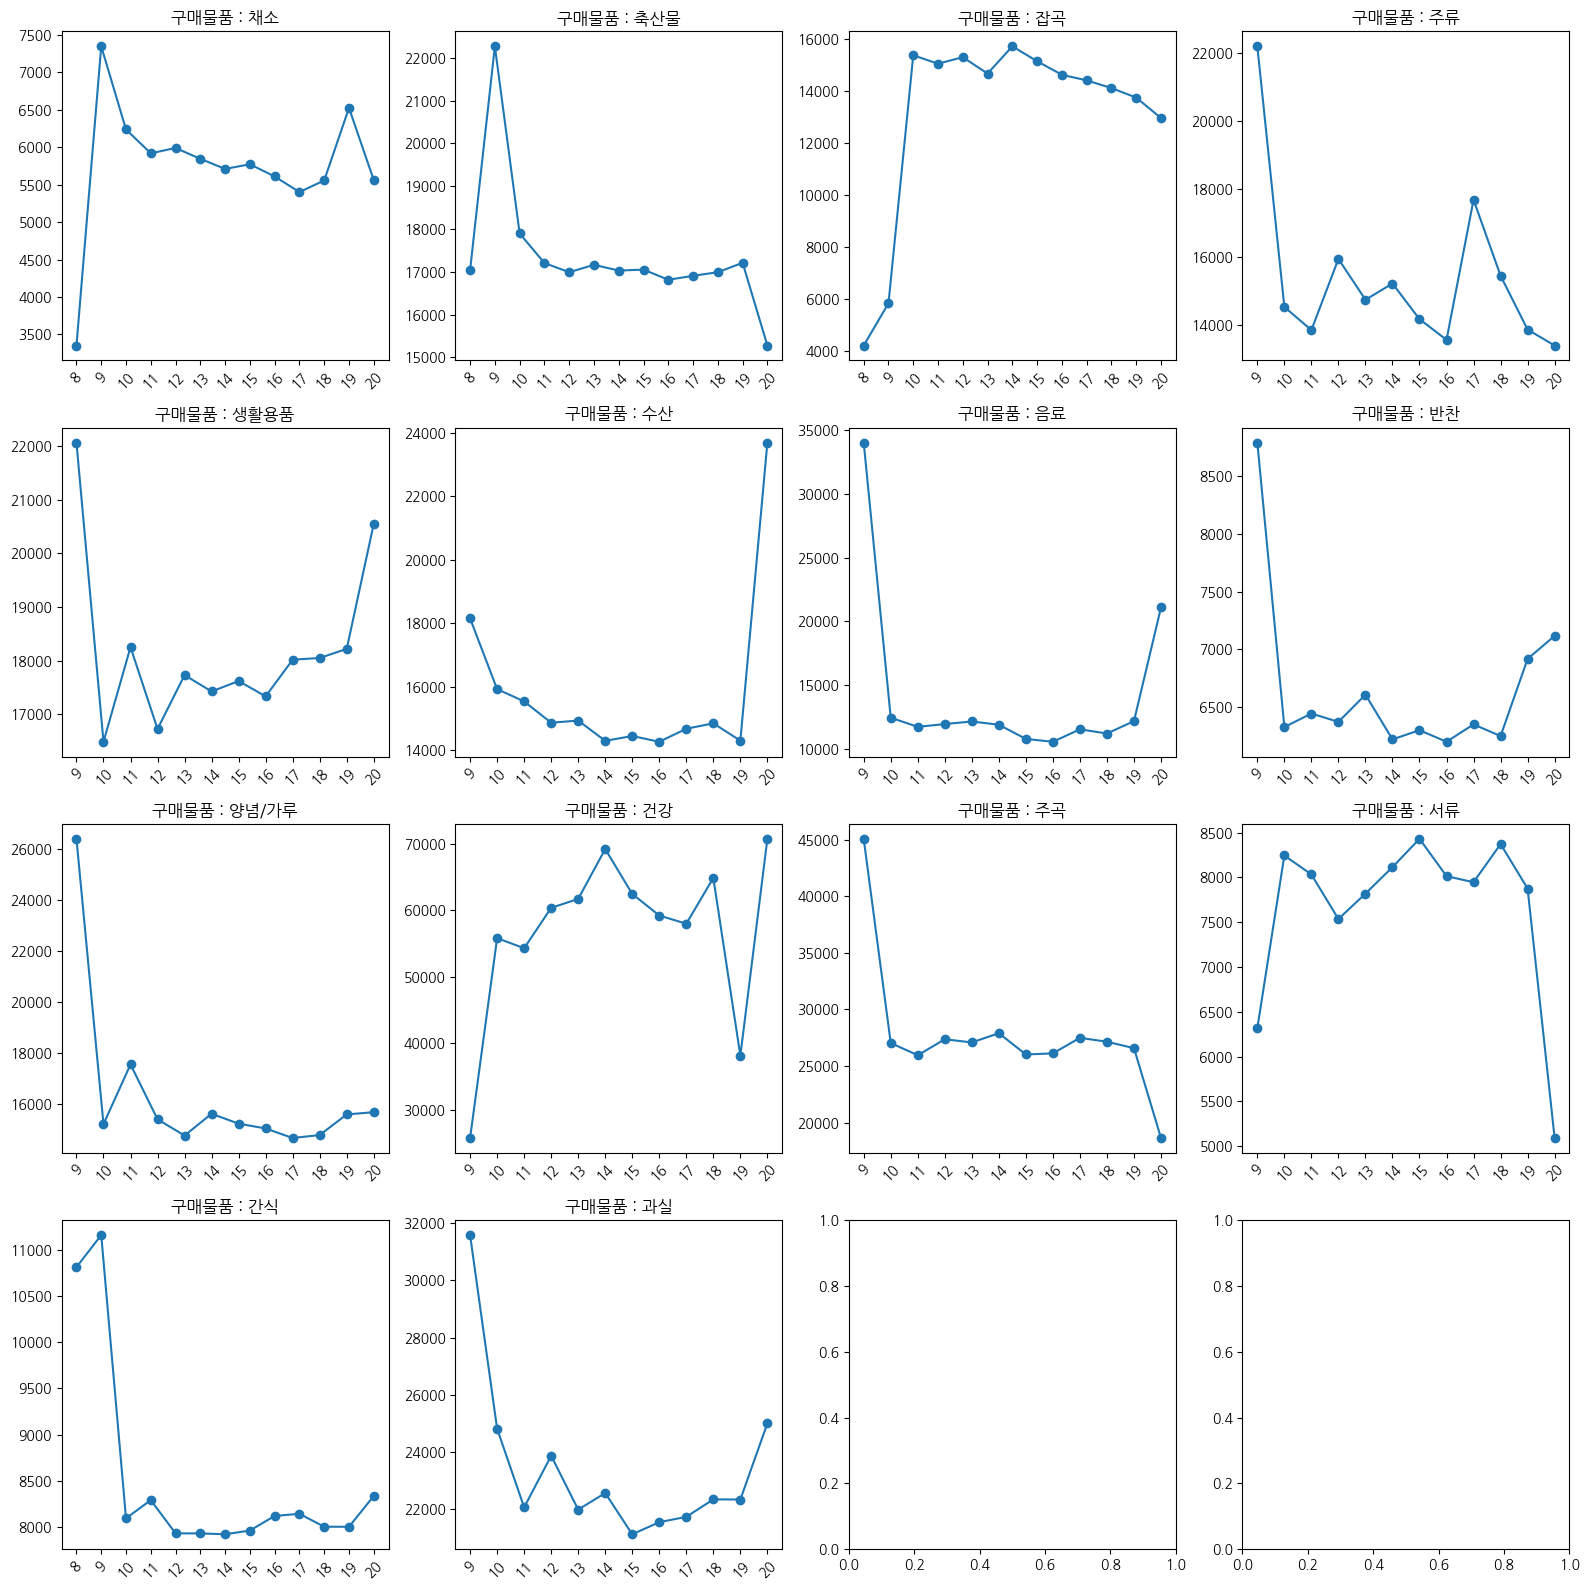

In [ ]:
fig , axes = plt.subplots(4,4,figsize=(16,16))

for i, ax in zip(set(df_group['물품대분류']), axes.flatten()):
    df_filtered = df_group[df_group['물품대분류'] == i].groupby(['구매시각_시간'])['구매금액'].mean()

    ax.plot(df_filtered.index , df_filtered, marker = 'o')
    ax.set_title('구매물품 : {}'.format(i))
    ax.set_xlabel('')
    ax.set_xticks(df_filtered.index)
    ax.set_xticklabels(df_filtered.index, rotation = 45)
plt.tight_layout()
plt.show()

각 물품별 잘팔리는 시간대를 설정하여 판매대에 올리면 좋을 것으로 보인다.

### 매장별로 판매량

In [ ]:
df_join.groupby(['구매매장','물품대분류'])['구매수량'].count().unstack()

물품대분류,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,학교급식
구매매장,,,,,,,,,,,,,,,,
매장A,9410.00,553.00,1746.00,53.00,6271.00,2474.00,610.00,3571.00,2386.00,2525.00,710.00,889.00,129.00,12767.00,8476.00,NaN
매장B,10401.00,662.00,1747.00,66.00,7716.00,2258.00,810.00,4524.00,3058.00,3416.00,811.00,898.00,85.00,15842.00,11482.00,NaN
매장C,18381.00,1223.00,3246.00,123.00,15971.00,4414.00,1752.00,8272.00,5721.00,5407.00,1541.00,1865.00,188.00,32352.00,22735.00,NaN
매장D,8125.00,458.00,2019.00,24.00,6442.00,1844.00,733.00,3969.00,2641.00,2482.00,787.00,904.00,85.00,15004.00,9590.00,1.00


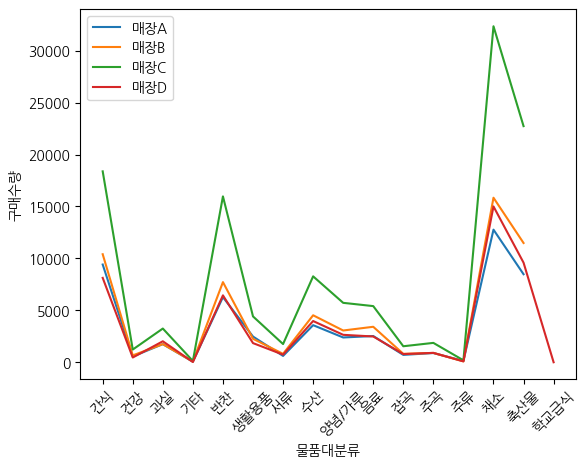

In [ ]:
_temp = df_join.groupby(['구매매장','물품대분류'])['구매수량'].count().unstack()
for i,idx in zip(range(4), _temp.index):
    sns.lineplot(x = _temp.columns , y = _temp.iloc[i,:], label = '{}'.format(idx))
plt.xticks(rotation = 45)
plt.ylabel('구매수량')
plt.show()

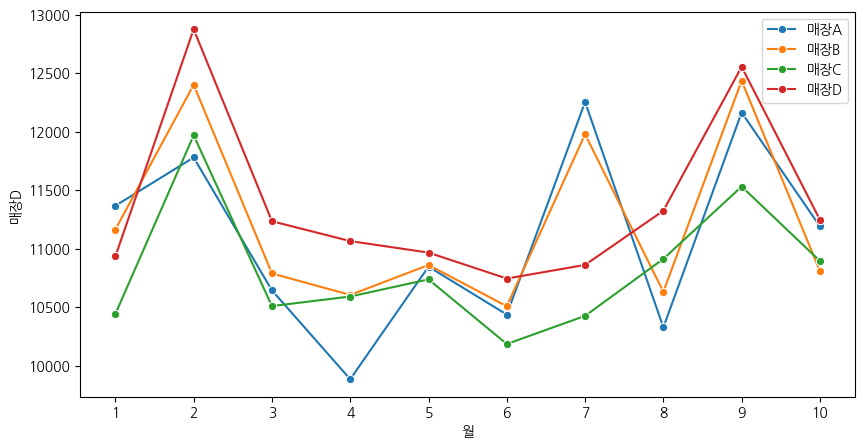

In [ ]:
df_join['month'] = df_join['공급일자'].dt.month
_temp = df_join.groupby(['구매매장','month'])[['구매금액']].mean().unstack()                
plt.figure(figsize = (10,5))
for i in range(4):
    sns.lineplot(x = range(1,11) , y = _temp.iloc[i,:], label = _temp.index[i], marker = 'o')
plt.xticks(range(1,11))
plt.legend()
plt.xlabel('월')
plt.show()

## EDA - 홍지호
: 회원 성별 및 연령에 따른 특징 분석

### 특이 회원 확인

In [ ]:
df_join[df_join['회원번호'] == 1670400000].describe()

,회원번호,구매수량,구매금액,Unnamed: 0,연령,구매횟수,총구매금액,구매시각_시간,구매시각_분,month
count,1355.00,1355.00,1355.00,1355.00,1355.00,1355.00,1355.00,1355.00,1355.00,1355.00
mean,1670400000.00,1.06,9638.92,4502.00,36.00,1355.00,13060734.00,14.65,29.24,5.43
std,0.00,0.89,17535.19,0.00,0.00,0.00,0.00,2.75,17.10,2.76
min,1670400000.00,-5.00,-166554.00,4502.00,36.00,1355.00,13060734.00,9.00,0.00,1.00
25%,1670400000.00,1.00,3733.00,4502.00,36.00,1355.00,13060734.00,12.00,14.00,3.00
50%,1670400000.00,1.00,6892.00,4502.00,36.00,1355.00,13060734.00,15.00,30.00,5.00
75%,1670400000.00,1.00,12214.00,4502.00,36.00,1355.00,13060734.00,17.00,44.00,8.00
max,1670400000.00,10.00,357995.00,4502.00,36.00,1355.00,13060734.00,20.00,59.00,10.00


### 성별 - 연령분포

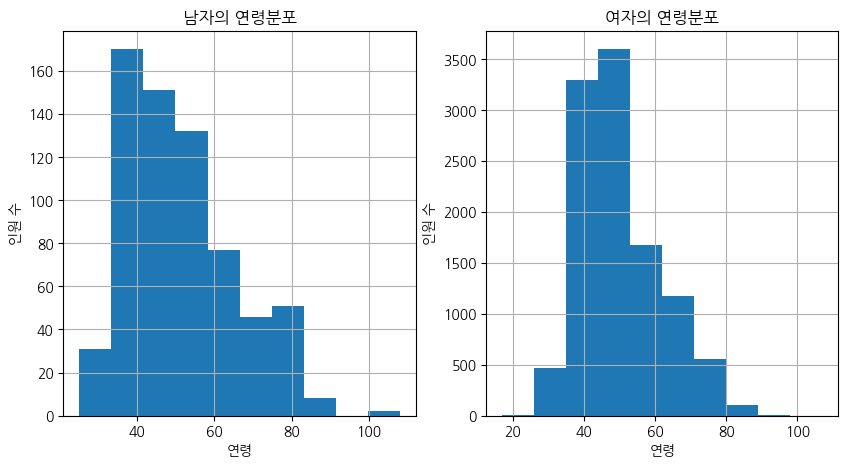

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
member['연령'][member['성별'] == '남'].hist()
plt.xlabel('연령');plt.ylabel('인원 수');plt.title('남자의 연령분포')
plt.subplot(1,2,2)
member['연령'][member['성별'] == '여'].hist()
plt.xlabel('연령');plt.ylabel('인원 수');plt.title('여자의 연령분포')
plt.show()

- 40-50대 전업주부가 가장 주된 고객층이며, 60-80대 여성 고객층도 그 수가 많다.
- 남성 고객은 수백명 수준으로, 여성 고객에 비해 주된 고객층이 아니다.

### 성별 - 구매율

<Axes: xlabel='성별', ylabel='count'>

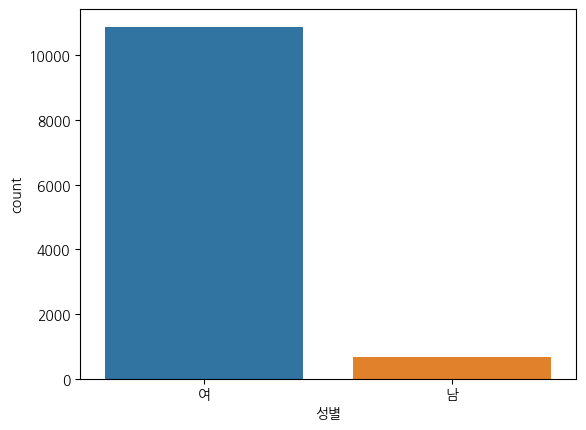

In [ ]:
sns.countplot(data = member, x = '성별')

In [ ]:
print(member['성별'].value_counts())

여    10885
남      668
Name: 성별, dtype: int64


In [ ]:
sum_man=member_modi[member_modi['성별']=='남']['총구매금액'].sum()
mean_man=member_modi[member_modi['성별']=='남']['총구매금액'].mean()
sum_woman=member_modi[member_modi['성별']=='여']['총구매금액'].sum()
mean_woman=member_modi[member_modi['성별']=='여']['총구매금액'].mean()
print(f'남자 총구매금액, 평균구매금액: {sum_man} , {mean_man}\n여자 총구매금액, 평균구매금액: {sum_woman} , {mean_woman}')

남자 총구매금액, 평균구매금액: 197226879.0 , 295249.81886227545
여자 총구매금액, 평균구매금액: 3059352530.0 , 281061.3256775379


<Axes: >

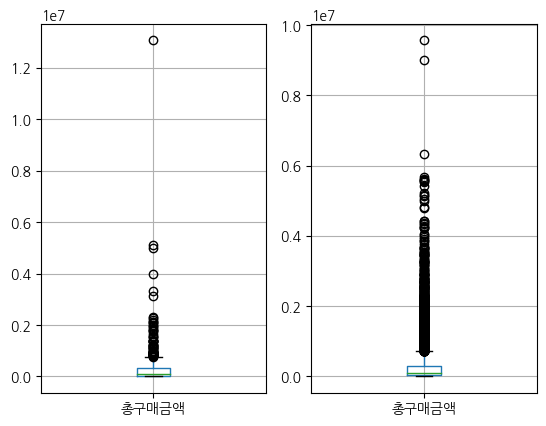

In [ ]:
plt.subplot(1,2,1)
member_modi[member_modi['성별']=='남'][['총구매금액']].boxplot()
plt.subplot(1,2,2)
member_modi[member_modi['성별']=='여'][['총구매금액']].boxplot()

### 연령대

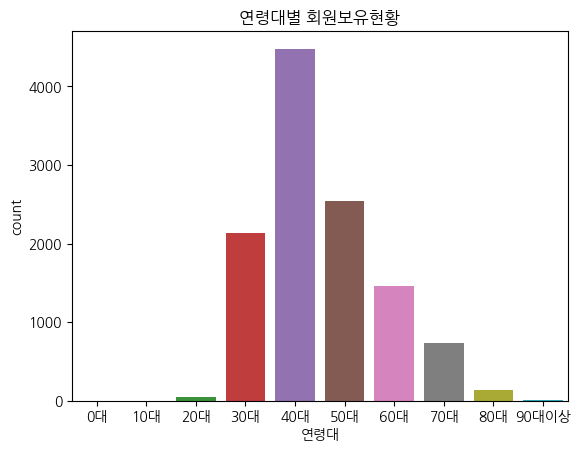

40대      4480
50대      2546
30대      2137
60대      1455
70대       736
80대       136
20대        52
90대이상      10
10대         1
Name: 연령대, dtype: int64


In [ ]:
labels = ["0대", "10대", "20대", "30대", "40대", "50대", "60대", "70대", "80대", "90대이상"]
sns.countplot(data = member_modi, x = '연령대', order = labels)
plt.title('연령대별 회원보유현황')
plt.show()

print(member_modi['연령대'].value_counts())


In [ ]:
age30_ideal=member_modi[member_modi['연령대']=='30대']
age30_ideal.drop(age30_ideal[age30_ideal['회원번호']==1670400000].index,axis=0,inplace=True)
print('30대 회원 중 회원번호1670400000(이상치?)를 제거했을 때의 구매금액 평균: {}'.format(age30_ideal['총구매금액'].mean()))


sum_mean_age=[]
for n in range(9):
    a=member_modi[member_modi['연령대']==str(n*10)+'대']['총구매금액'].sum()
    b=member_modi[member_modi['연령대']==str(n*10)+'대']['총구매금액'].mean()
    c=member_modi['연령대'].value_counts().get(str(n*10)+'대', 0)
    sum_mean_age.append([c,a,b])
a=member_modi[member_modi['연령대']=='90대이상']['총구매금액'].sum()
b=member_modi[member_modi['연령대']=='90대이상']['총구매금액'].mean()
c=member_modi['연령대'].value_counts().get('90대이상', 0)
sum_mean_age.append([c,a,b])
result=pd.DataFrame(sum_mean_age,index=["0대", "10대", "20대", "30대", "40대", "50대", "60대", "70대", "80대", "90대이상"],columns=['인원수','전체구매금액합','구매금액평균'])

result

30대 회원 중 회원번호1670400000(이상치?)를 제거했을 때의 구매금액 평균: 190800.04915730338


C:\Users\cowls\AppData\Local\Temp\ipykernel_31900\1805664608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age30_ideal.drop(age30_ideal[age30_ideal['회원번호']==1670400000].index,axis=0,inplace=True)


,인원수,전체구매금액합,구매금액평균
0대,0,0.00,NaN
10대,1,334756.00,334756.00
20대,52,9891976.00,190230.31
30대,2137,420609639.00,196822.48
40대,4480,1202483973.00,268411.60
50대,2546,869897980.00,341672.42
60대,1455,462189292.00,317655.87
70대,736,249673750.00,339230.64
80대,136,33627653.00,247262.15
90대이상,10,7688808.00,768880.80


- 아래에서처럼 10대는 33만원 쓴 혼자뿐이라 예외처리를 고려할 수 있다.
- 50, 70, 60, 40, 80대순으로 평균구매금액이 높으며, 연령에 따라 의미가 있는 것으로 추정할 수 있다.

### 30대 이상치 확인

In [ ]:
age30_ideal=member_modi[member_modi['연령대']=='30대']
age30_ideal.drop(age30_ideal[age30_ideal['회원번호']==1670400000].index,axis=0,inplace=True)
age30_ideal['총구매금액'].mean()

C:\Users\cowls\AppData\Local\Temp\ipykernel_31900\1140438863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age30_ideal.drop(age30_ideal[age30_ideal['회원번호']==1670400000].index,axis=0,inplace=True)


190800.04915730338

### 이상치에 대한 멤버십 특성 확인

In [ ]:
member_modi.iloc[member_modi[member_modi['연령대']=='30대']['총구매금액'].idxmax(),:]

Unnamed: 0                    4502
회원번호                    1670400000
조합원상태                           탈퇴
주소                         기타-비조합원
성별                               남
연령                           36.00
배송서비스신청여부                      미신청
모바일알람여부                         수신
Gold_member                 normal
구매횟수                       1355.00
최근구매일자         2022-10-30 00:00:00
총구매금액                  13060734.00
연령대                            30대
Name: 4502, dtype: object

In [ ]:
member_modi[(member_modi['조합원상태']!='정상회원')&(member_modi['Gold_member']=='VIP')]
#VIP는 정상회원만 가능!

,Unnamed: 0,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,구매횟수,최근구매일자,총구매금액,연령대


### 멤버십별 연령대 확인
- 결측치는 0으로 채웠다.

In [ ]:
member_modi.groupby(['연령대','Gold_member']).size().unstack().fillna(0)

Gold_member,VIP,normal
연령대,,
10대,0.00,1.00
20대,0.00,52.00
30대,13.00,2124.00
40대,79.00,4401.00
50대,65.00,2481.00
60대,30.00,1425.00
70대,13.00,723.00
80대,4.00,132.00
90대이상,1.00,9.00


In [ ]:
member_modi.iloc[member_modi[member_modi['연령대']=='30대']['총구매금액'].idxmax(),:]

Unnamed: 0                    4502
회원번호                    1670400000
조합원상태                           탈퇴
주소                         기타-비조합원
성별                               남
연령                           36.00
배송서비스신청여부                      미신청
모바일알람여부                         수신
Gold_member                 normal
구매횟수                       1355.00
최근구매일자         2022-10-30 00:00:00
총구매금액                  13060734.00
연령대                            30대
Name: 4502, dtype: object

## EDA - 이호준
: 계절 별 판매 현황 분석

#### 1~10월까지의 인기상품의 경우 채소,축산물,간식,반찬,수산 순으로 나타내며, 특별한 현상을 보이지는 않는다.
#### 따라서 계절 별로 묶어서 잘팔리는 상품을 찾아보는 것이 타당해보인다.

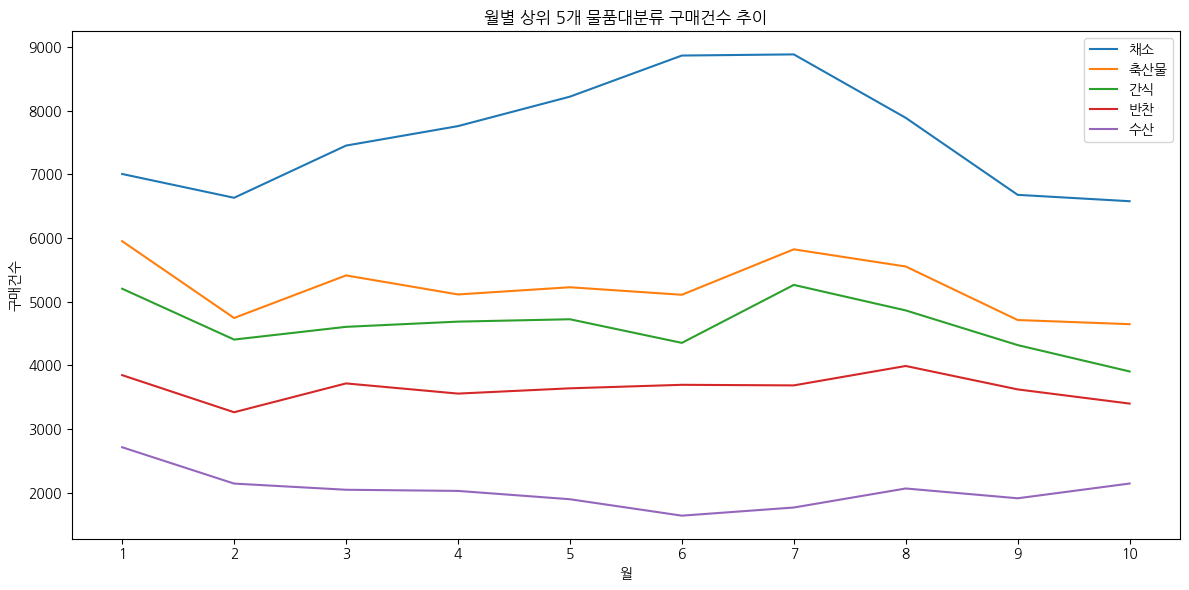

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 월별로 그룹화하고 물품대분류별 구매 건수 계산
grouped = df_join.groupby([pd.Grouper(key='공급일자', freq='M'), '물품대분류'])['물품대분류'].count().reset_index(name='구매건수')


top_categories = grouped.groupby('물품대분류')['구매건수'].sum().sort_values(ascending = False).index[:5]
# # 상위 5개의 물품대분류 추출
# top_categories = grouped['물품대분류'].value_counts().head(5).index

# 월별 그룹에 따른 상위 5개 물품대분류별 구매 건수 시각화
plt.figure(figsize=(12, 6))
for category in top_categories:
    data = grouped[grouped['물품대분류'] == category]
    plt.plot(data['공급일자'].dt.month, data['구매건수'], label=category)

plt.xlabel('월')
plt.ylabel('구매건수')
plt.title('월별 상위 5개 물품대분류 구매건수 추이')
plt.legend()
plt.xticks(range(1,11))
plt.tight_layout()

plt.show()

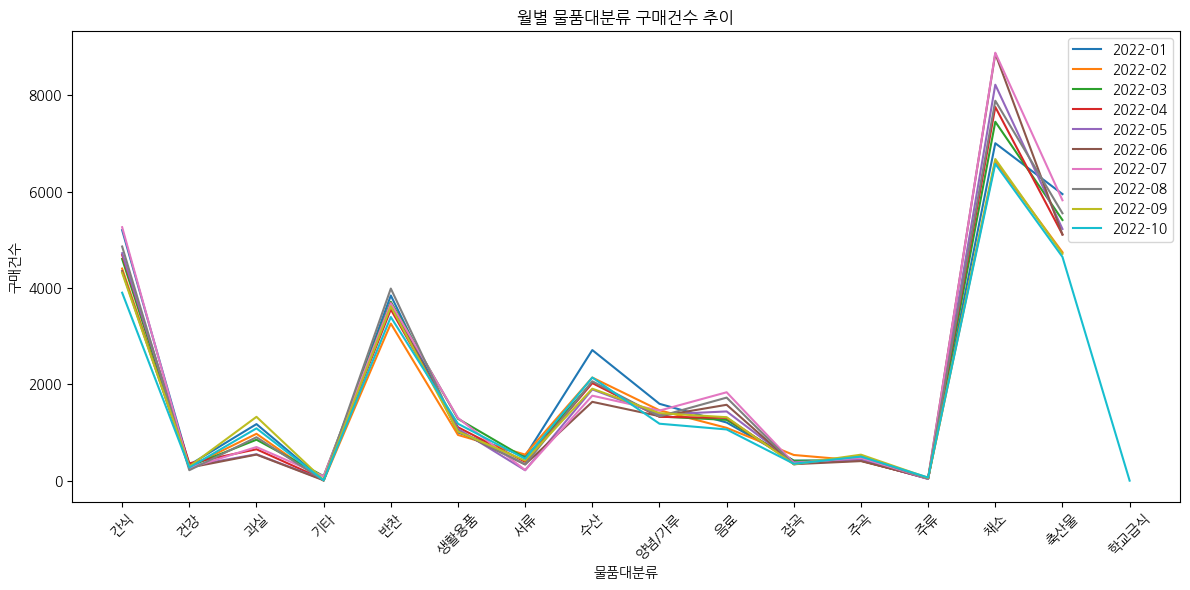

In [ ]:
# datetime64 열을 datetime 형태로 변환
df_join['공급일자'] = pd.to_datetime(df_join['공급일자'])

# '물품대분류' 열의 값을 문자열로 변환
df_join['물품대분류'] = df_join['물품대분류'].astype(str)

# 월별로 그룹화하고 물품대분류별 구매 건수 계산
grouped = df_join.groupby([pd.Grouper(key='공급일자', freq='M'), '물품대분류'])['물품대분류'].count().reset_index(name='구매건수')

# 월별 그룹에 따른 물품대분류별 구매 건수 시각화
plt.figure(figsize=(12, 6))
for month_group in grouped['공급일자'].dt.to_period('M').unique():
    data = grouped[grouped['공급일자'].dt.to_period('M') == month_group]
    plt.plot(data['물품대분류'], data['구매건수'], label=str(month_group))

plt.xlabel('물품대분류')
plt.ylabel('구매건수')
plt.title('월별 물품대분류 구매건수 추이')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

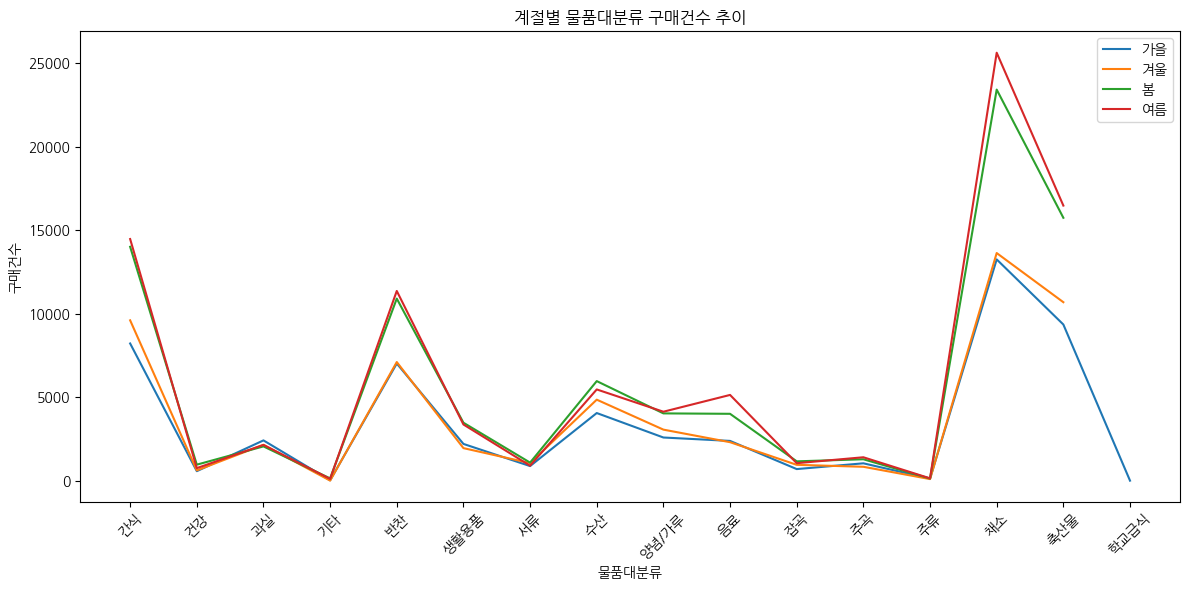

In [ ]:
# datetime64 열을 datetime 형태로 변환
df_join['공급일자'] = pd.to_datetime(df_join['공급일자'])

# '물품대분류' 열의 값을 문자열로 변환
df_join['물품대분류'] = df_join['물품대분류'].astype(str)

# 월별 그룹에 따라 계절 그룹명 매핑
def get_season(month):
    if 3 <= month <= 5:
        return '봄'
    elif 6 <= month <= 8:
        return '여름'
    elif 8 <= month <= 10:
        return '가을'
    else:
        return '겨울'

df_join['계절'] = df_join['공급일자'].dt.month.apply(get_season)

# 계절별로 그룹화하고 물품대분류별 구매 건수 계산
grouped = df_join.groupby(['계절', '물품대분류'])['물품대분류'].count().reset_index(name='구매건수')

# 계절별 그룹에 따른 물품대분류별 구매 건수 시각화
plt.figure(figsize=(12, 6))
for season in grouped['계절'].unique():
    data = grouped[grouped['계절'] == season]
    plt.plot(data['물품대분류'], data['구매건수'], label=season)

plt.xlabel('물품대분류')
plt.ylabel('구매건수')
plt.title('계절별 물품대분류 구매건수 추이')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

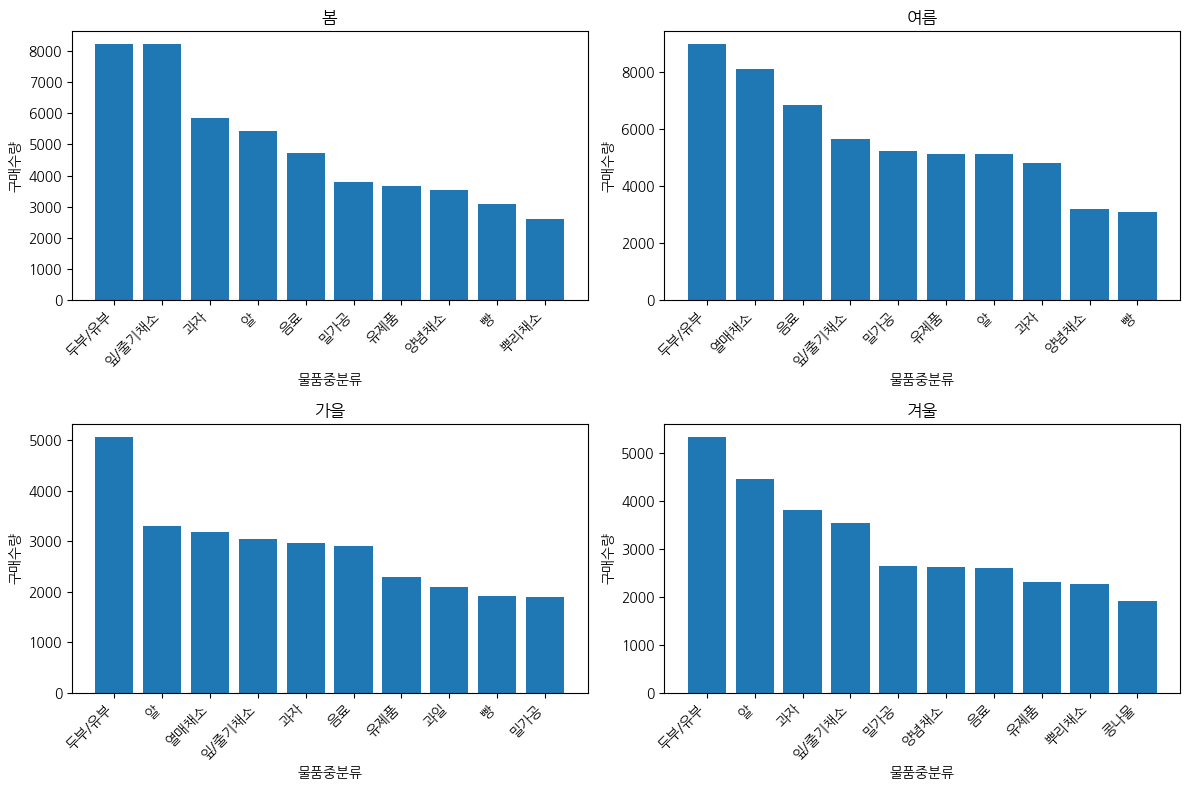

In [ ]:
# datetime64 열을 datetime 형태로 변환
df_join['공급일자'] = pd.to_datetime(df_join['공급일자'])

# '물품대분류' 열의 값을 문자열로 변환
df_join['물품대분류'] = df_join['물품대분류'].astype(str)

# 월별 그룹에 따라 계절 그룹명 매핑
def get_season(month):
    if 3 <= month <= 5:
        return '봄'
    elif 6 <= month <= 8:
        return '여름'
    elif 8 <= month <= 10:
        return '가을'
    else:
        return '겨울'

df_join['계절'] = df_join['공급일자'].dt.month.apply(get_season)

# 각 계절 그룹별로 가장 많이 팔린 상품 5개 추출
top_products_per_season = df_join.groupby(['계절', '물품중분류'])['구매수량'].sum().reset_index()
top_products_per_season = top_products_per_season.groupby('계절').apply(lambda x: x.nlargest(10, '구매수량')).reset_index(drop=True)

# 원하는 순서로 계절 설정
seasons = ['봄', '여름', '가을', '겨울']

# 2행 2열 서브플롯으로 차트 출력
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for idx, season in enumerate(seasons):
    row = idx // 2
    col = idx % 2
    data = top_products_per_season[top_products_per_season['계절'] == season]
    ax = axes[row, col]
    ax.bar(data['물품중분류'], data['구매수량'])
    ax.set_title(season)
    ax.set_xlabel('물품중분류')
    ax.set_ylabel('구매수량')
    ax.set_xticks(range(len(data['물품중분류'])))
    ax.set_xticklabels(data['물품중분류'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

- '두부/유부'는 계절과 상관없이 가장 인기있는 상품이다. 이 점을 이용해서 마트만의 특별한 친환경 유기농 유제품임을 강조해도 좋을듯

### 계절 특화 상품과 관련한 분석방향 제시
#### 봄
- '잎/줄기채소'가가 봄에 특화된 제품일 수 있기 때문에 해당 계절에 중점적으로 마케팅해야할 변수로 추정 가능
- 물품중분류로 구분했는데 이를 물품소분류나 물품명으로 다시 알아볼 만한 가치가 있다고 판단

#### 여름
- '열매채소', '음료'가 눈에 띄는 자료이다. 더운 날씨를 완화시킬 수 있는 상품들인지를 알아볼 예정

#### 가을
- 봄,여름,겨울이 가지는 인기상품이 골고루 비치된 추이를 보이는데, 날씨가 비슷해서 그런가 우선 지극히 주관적인 의견

#### 겨울
- 11월 12월이 없어서 잘 모르겠다 일단 보류

### 봄(잎/줄기채소), 여름(열매채소, 음료), 겨울(알)의 파이차트
- 봄과 여름의 열매채소는 종류가 다양해서 상위 10개만 표시하고 나머지는 전체상품 표시
- 가을은 봄,여름,겨울 인기상품 다있어서 우선 생략

C:\Users\cowls\AppData\Local\Temp\ipykernel_31900\2609408300.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_subcategories = top_subcategories.append({'물품소분류': '기타', '구매금액': other_total}, ignore_index=True)
C:\Users\cowls\AppData\Local\Temp\ipykernel_31900\2609408300.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_subcategories = top_subcategories.append({'물품소분류': '기타', '구매금액': other_total}, ignore_index=True)


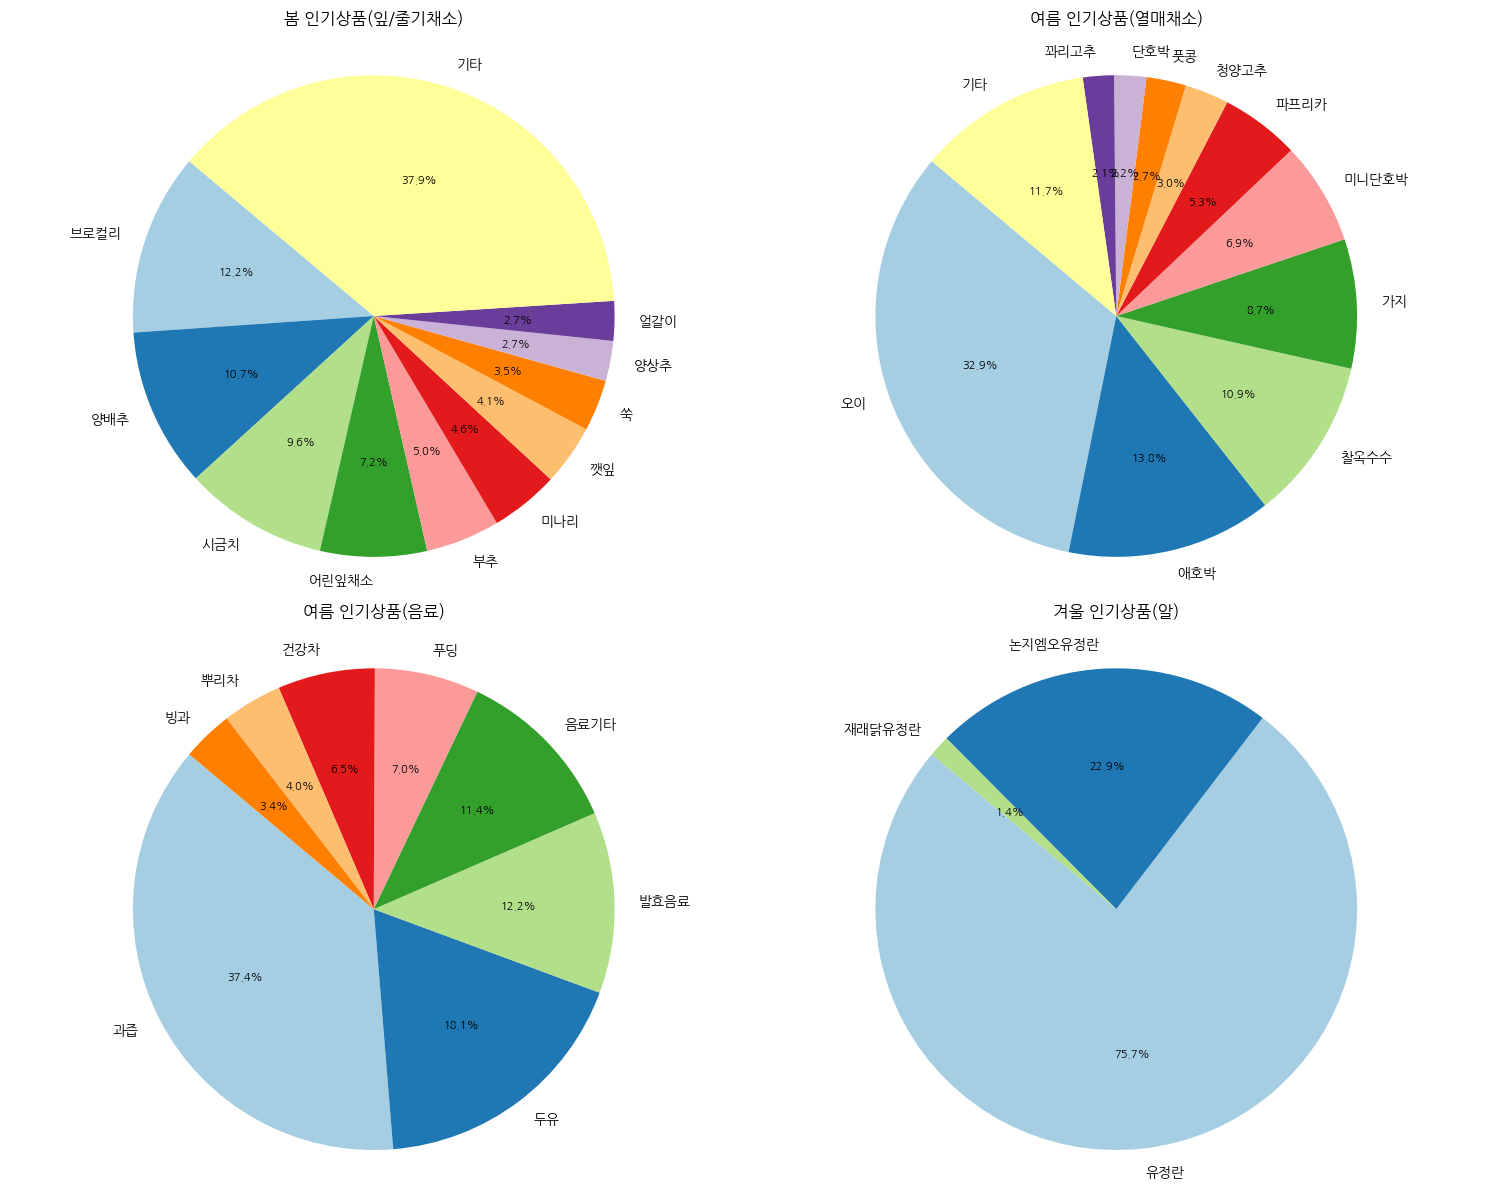

In [ ]:
# 데이터 추출 및 처리
categories = ['잎/줄기채소', '열매채소', '음료', '알']

plt.figure(figsize=(15, 12))

for idx, category in enumerate(categories):
    data = df_join[df_join['물품중분류'] == category]
    subcategories_total_purchase = data.groupby('물품소분류')['구매금액'].sum().reset_index()
    subcategories_total_purchase = subcategories_total_purchase.sort_values('구매금액', ascending=False)
    
    if category in ['음료', '알']:
        plt.subplot(2, 2, idx + 1)
        wedges, texts, autotexts = plt.pie(
            subcategories_total_purchase['구매금액'],
            labels=subcategories_total_purchase['물품소분류'],
            autopct='%1.1f%%',
            startangle=140,
            colors=plt.cm.Paired(range(len(subcategories_total_purchase))),
            textprops={'fontsize': 10, 'color': 'black'}
        )
        plt.setp(autotexts, size=8, weight='bold')
        
        if category == '음료':
            plt.title("여름 인기상품(음료)", pad=20)
        elif category == '알':
            plt.title("겨울 인기상품(알)", pad=20)
        
        plt.axis('equal')
    else:
        top_subcategories = subcategories_total_purchase.nlargest(10, '구매금액')
        other_total = subcategories_total_purchase.iloc[10:]['구매금액'].sum()
        
        top_subcategories = top_subcategories.append({'물품소분류': '기타', '구매금액': other_total}, ignore_index=True)
        
        plt.subplot(2, 2, idx + 1)
        wedges, texts, autotexts = plt.pie(
            top_subcategories['구매금액'],
            labels=top_subcategories['물품소분류'],
            autopct='%1.1f%%',
            startangle=140,
            colors=plt.cm.Paired(range(len(top_subcategories))),
            textprops={'fontsize': 10, 'color': 'black'}
        )
        plt.setp(autotexts, size=8, weight='bold')
        
        if category == '잎/줄기채소':
            plt.title("봄 인기상품(잎/줄기채소)", pad=20)
        elif category == '열매채소':
            plt.title("여름 인기상품(열매채소)", pad=20)
        
        plt.axis('equal')

plt.tight_layout()
plt.show()

### 봄(잎/줄기채소)와 여름(열매채소)가 유기농인 점을 어필해서 마케팅 전략을 세울 수 있을 것이다.
### 여름(음료)는 무려 과즙이 잘팔리는데, 이것 또한 유기농 과일 음료라고 추정할 수 있다.

## EDA - 이채진
: 회원 등급 별 판매량 분석

In [ ]:
df_vip = df_join[df_join['Gold_member']=='VIP']
df_normal = df_join[df_join['Gold_member']=='normal']

In [ ]:
# 탈퇴할 경우, vip에서 normal로 강등했다고 가정, 탈퇴한 회원 제거.
df_normal = df_normal[df_normal['조합원상태'] == '정상회원']

In [ ]:
df_vip.describe(include = 'all')

C:\Users\cowls\AppData\Local\Temp\ipykernel_31900\268285958.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_vip.describe(include = 'all')
C:\Users\cowls\AppData\Local\Temp\ipykernel_31900\268285958.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_vip.describe(include = 'all')
C:\Users\cowls\AppData\Local\Temp\ipykernel_31900\268285958.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behav

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,모바일알람여부,Gold_member,구매횟수,최근구매일자,총구매금액,연령대,구매시각_시간,구매시각_분,month,계절
count,43114,43114.00,43114,43114,43114,43114,43114,43114.00,43114.00,43114,...,43114,43114,43114.00,43114,43114.00,43114,43114.00,43114.00,43114.00,43114
unique,295,NaN,1,15,62,372,1996,NaN,NaN,4,...,2,1,NaN,16,NaN,7,NaN,NaN,NaN,4
top,2022-08-12 00:00:00,NaN,정상회원,채소,잎/줄기채소,두부,두부(1모:420g),NaN,NaN,매장C,...,수신,VIP,NaN,2022-10-30 00:00:00,NaN,40대,NaN,NaN,NaN,여름
freq,393,NaN,43114,12681,3365,1906,1101,NaN,NaN,24564,...,34626,43114,NaN,17532,NaN,17268,NaN,NaN,NaN,13803
first,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-09-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-10-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-10-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,629059614.98,NaN,NaN,NaN,NaN,NaN,1.12,11252.17,NaN,...,NaN,NaN,252.87,NaN,2925795.12,NaN,13.78,28.51,5.51,NaN
std,NaN,401739452.63,NaN,NaN,NaN,NaN,NaN,0.88,20383.95,NaN,...,NaN,NaN,104.08,NaN,1656337.50,NaN,3.04,17.39,2.82,NaN
min,NaN,20588608.00,NaN,NaN,NaN,NaN,NaN,-50.00,-545608.00,NaN,...,NaN,NaN,65.00,NaN,443091.00,NaN,8.00,0.00,1.00,NaN
25%,NaN,282238208.00,NaN,NaN,NaN,NaN,NaN,1.00,4020.00,NaN,...,NaN,NaN,173.00,NaN,1750785.00,NaN,11.00,13.00,3.00,NaN


In [ ]:
df_normal.describe(include='all')

C:\Users\cowls\AppData\Local\Temp\ipykernel_31900\2058618598.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_normal.describe(include='all')
C:\Users\cowls\AppData\Local\Temp\ipykernel_31900\2058618598.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_normal.describe(include='all')
C:\Users\cowls\AppData\Local\Temp\ipykernel_31900\2058618598.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future 

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,모바일알람여부,Gold_member,구매횟수,최근구매일자,총구매금액,연령대,구매시각_시간,구매시각_분,month,계절
count,248257,248257.00,248257,248257,248257,248257,248257,248257.00,248257.00,248257,...,248257,248257,248257.00,248257,248257.00,248238,248257.00,248257.00,248257.00,248257
unique,295,NaN,1,16,63,386,2349,NaN,NaN,4,...,2,1,NaN,295,NaN,9,NaN,NaN,NaN,4
top,2022-02-13 00:00:00,NaN,정상회원,채소,두부/유부,두부,두부(1모:420g),NaN,NaN,매장C,...,.,normal,NaN,2022-10-28 00:00:00,NaN,40대,NaN,NaN,NaN,여름
freq,1967,NaN,248257,62519,18580,16688,9553,NaN,NaN,97129,...,207906,248257,NaN,27106,NaN,93637,NaN,NaN,NaN,77881
first,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-10-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-10-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,754082436.11,NaN,NaN,NaN,NaN,NaN,1.15,11026.36,NaN,...,NaN,NaN,72.86,NaN,802320.03,NaN,14.07,29.05,5.46,NaN
std,NaN,429297829.86,NaN,NaN,NaN,NaN,NaN,0.74,17262.69,NaN,...,NaN,NaN,60.83,NaN,750619.49,NaN,2.78,17.08,2.85,NaN
min,NaN,18613824.00,NaN,NaN,NaN,NaN,NaN,-30.00,-666216.00,NaN,...,NaN,NaN,1.00,NaN,0.00,NaN,8.00,0.00,1.00,NaN
25%,NaN,398551872.00,NaN,NaN,NaN,NaN,NaN,1.00,4020.00,NaN,...,NaN,NaN,27.00,NaN,268689.00,NaN,12.00,14.00,3.00,NaN


### 분류별 판매량 확인

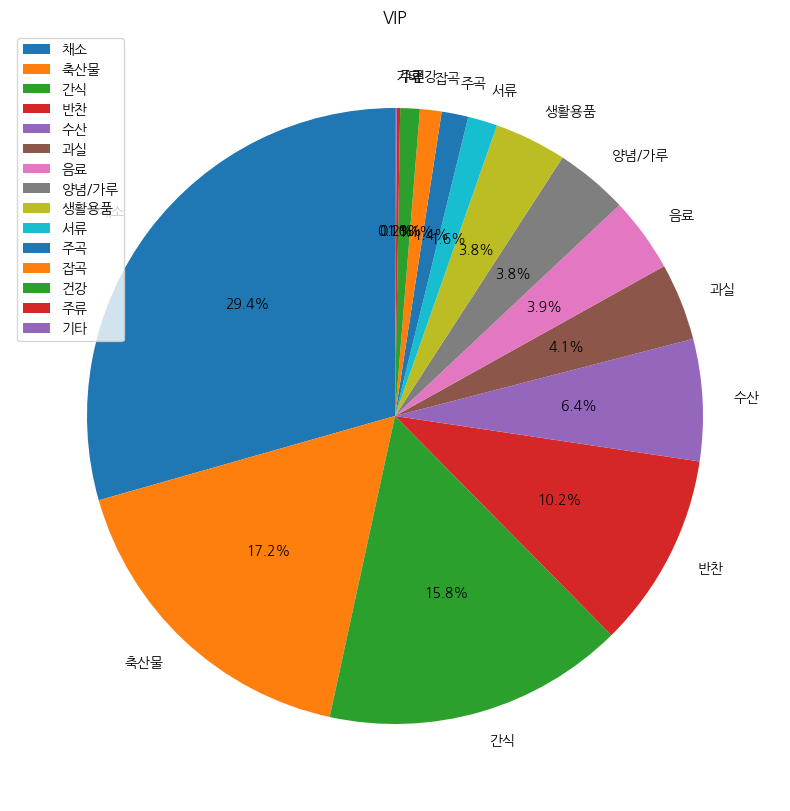

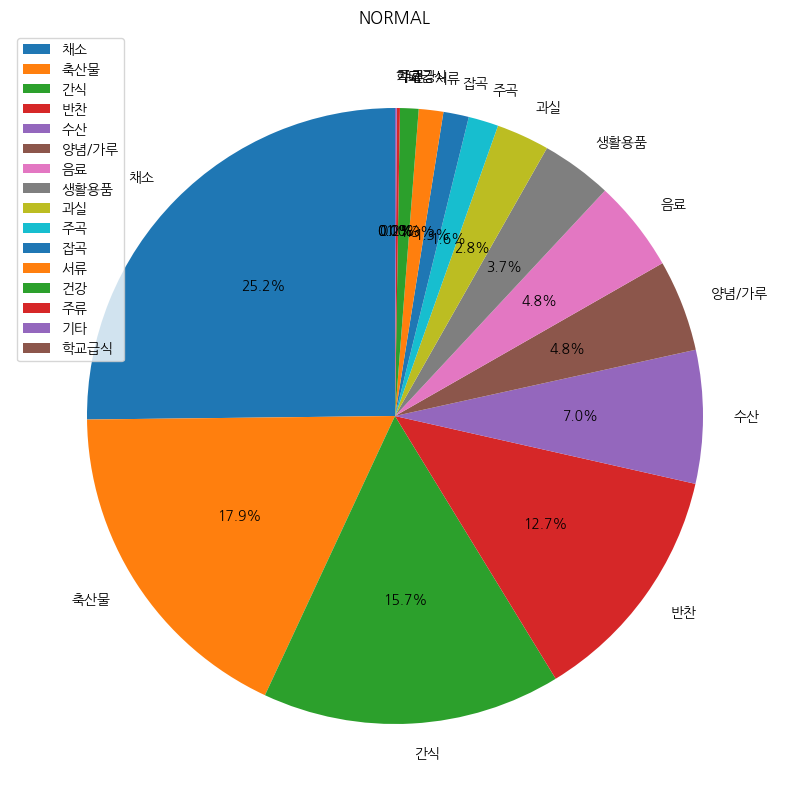

In [ ]:
# 물품대분류 기준
cnt_vip = df_vip['물품대분류'].value_counts()
cnt_nor = df_normal['물품대분류'].value_counts()

plt.figure(figsize = (10,10))
plt.pie(cnt_vip, labels=cnt_vip.index, autopct='%1.1f%%', startangle=90)
plt.title('VIP')
plt.legend()
plt.show()

plt.figure(figsize = (10,10))
plt.pie(cnt_nor, labels=cnt_nor.index, autopct='%1.1f%%', startangle=90)
plt.title('NORMAL')
plt.legend()
plt.show()

- 물품대분류 기준 등급별 판매현황을 비교해보았을 때, 큰 차이는 보이지 않지만 채소와 과실의 구매율이 normal보다 vip가 약간 높게 나타난다.   
- vip를 위한 프로모션 전략에 활용할 수 있을 것으로 보인다.

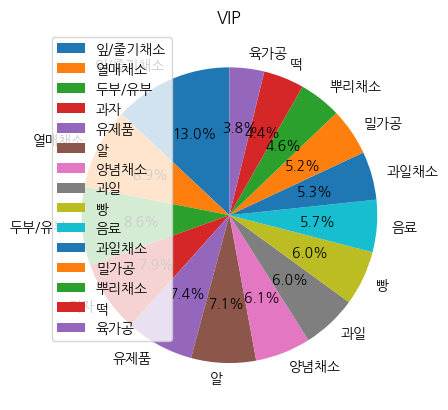

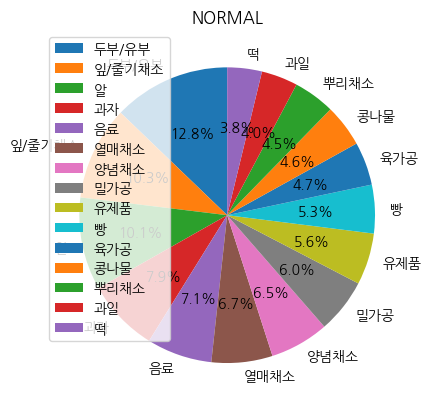

In [ ]:
# 물품중분류 기준
cnt_vip = df_vip['물품중분류'].value_counts()
cnt_nor = df_normal['물품중분류'].value_counts()

plt.pie(cnt_vip[:15], labels=cnt_vip[:15].index, autopct='%1.1f%%', startangle=90)
plt.title('VIP')
plt.legend()
plt.show()

plt.pie(cnt_nor[:15], labels=cnt_nor[:15].index, autopct='%1.1f%%', startangle=90)
plt.title('NORMAL')
plt.legend()
plt.show()

- 물품중분류 기준 등급별 판매현황을 비교해보았을 때, 잎/줄기채소와 열매채소, 유제품 등의 구매율이 normal보다 vip가 약간 높게 나타난다.   
- 마찬가지로 vip를 위한 프로모션 전략에 활용할 수 있을 것으로 보인다.

### 평균 구매 금액 비교

In [ ]:
# 한 번(하나의 품목) 구매할 때의 평균 구매 금액
index = ['VIP', 'NORMAL']

val = []
val.append(df_vip['구매금액'].mean().round(2))
val.append(df_normal['구매금액'].mean().round(2))

print(val)

[11252.17, 11026.36]


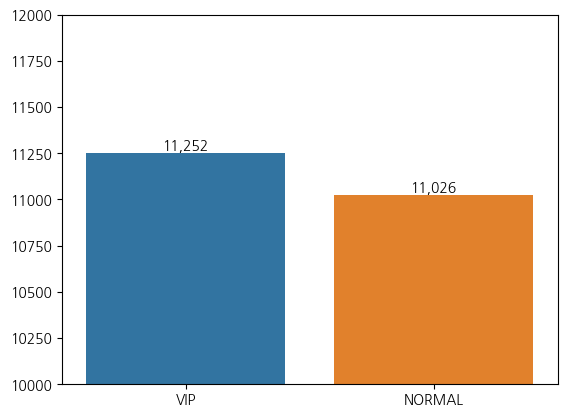

In [ ]:
ax = sns.barplot(x = index,y = val)
plt.ylim(10000,12000)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), format(int(p.get_height()), ','), ha='center', va='bottom', fontsize=10)

한 번의 구매(하나의 품목)에 대한 등급별 평균 구매금액을 확인한 결과, 미세하게 vip의 구매금액이 높게 나타났다.

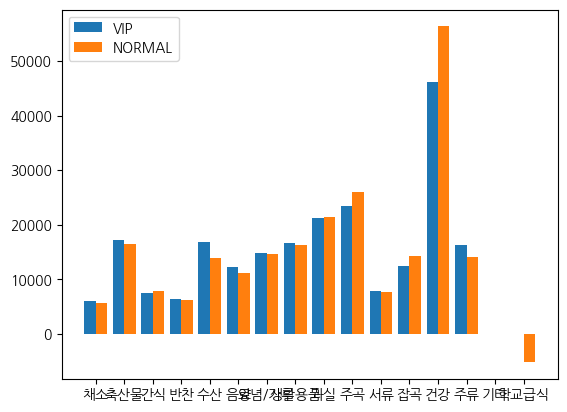

In [ ]:
import numpy as np

l_vip = []
l_nor = []
for v in bigsplit :
    l_vip.append(df_vip.query('물품대분류=="{}"'.format(v))['구매금액'].mean())
    l_nor.append(df_normal.query('물품대분류=="{}"'.format(v))['구매금액'].mean())

x = np.arange(len(bigsplit))
plt.bar(x-0.2, l_vip, 0.4, label='VIP')
plt.bar(x+0.2, l_nor, 0.4, label='NORMAL')

plt.xticks(x, bigsplit)
plt.legend()
plt.show()

위의 결과에 대한 가설 : 동일 품목에 대해 vip가 normal에 비해 더 비싼 품목을 구매한다.
- 물품대분류 기준, 그래프 확인 결과 그렇다고 보기 어려움.

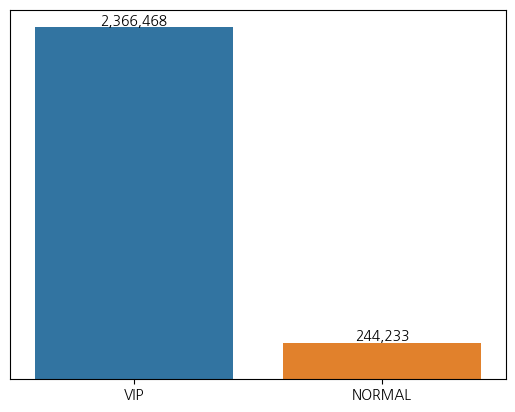

In [ ]:
# vip 별 총 구매 금액
grouped = df_vip.groupby('회원번호')

sum_price = grouped['구매금액'].sum()
avg_vip = sum_price.mean()

# normal 별 총 구매 금액
grouped = df_normal.groupby('회원번호')

sum_price = grouped['구매금액'].sum()
avg_normal = sum_price.mean()

val = [avg_vip, avg_normal]

ax = sns.barplot(x = index, y = val)
plt.yticks([])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), format(int(p.get_height()), ','), ha='center', va='bottom', fontsize=10)

- 등급별 총 구매금액을 확인한 결과, 압도적으로 vip의 구매금액이 높게 나타났다.   
- 따라서 누적 구매금액이 높은 사람을 vip로 선정한다고 추측할 수 있다.

### 인당 방문 횟수(날짜 기준) 비교

In [ ]:
## vip 별 방문 횟수
grouped = df_vip.groupby('회원번호')
avg_vip = grouped['공급일자'].nunique().mean()

## normal 별 방문 횟수
grouped = df_normal.groupby('회원번호')
avg_normal = grouped['공급일자'].nunique().mean()

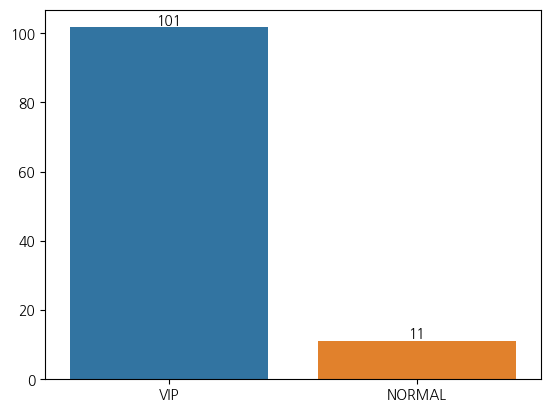

In [ ]:
val = [avg_vip, avg_normal]

ax = sns.barplot(x = index, y = val)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), format(int(p.get_height()), ','), ha='center', va='bottom', fontsize=10)

- 회원당 총 구매횟수(일자 기준)를 확인한 결과, VIP가 normal에 비해 압도적으로 높게 나타났다.   
- 따라서 구매횟수가 많고, 구매금액이 높은 사람을 vip로 선정한다고 추측할 수 있다.

### 매장별 VIP 현황

In [ ]:
a_vip = df_vip[df_vip['구매매장']=='매장A']
b_vip = df_vip[df_vip['구매매장']=='매장B']
c_vip = df_vip[df_vip['구매매장']=='매장C']
d_vip = df_vip[df_vip['구매매장']=='매장D']

In [ ]:
a_vip.describe(include='all')

C:\Users\cowls\AppData\Local\Temp\ipykernel_31900\3947041706.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  a_vip.describe(include='all')
C:\Users\cowls\AppData\Local\Temp\ipykernel_31900\3947041706.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  a_vip.describe(include='all')
C:\Users\cowls\AppData\Local\Temp\ipykernel_31900\3947041706.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,모바일알람여부,Gold_member,구매횟수,최근구매일자,총구매금액,연령대,구매시각_시간,구매시각_분,month,계절
count,5043,5043.00,5043,5043,5043,5043,5043,5043.00,5043.00,5043,...,5043,5043,5043.00,5043,5043.00,5043,5043.00,5043.00,5043.00,5043
unique,295,NaN,1,15,60,312,1147,NaN,NaN,1,...,2,1,NaN,10,NaN,6,NaN,NaN,NaN,4
top,2022-07-22 00:00:00,NaN,정상회원,채소,잎/줄기채소,우유/산양유,두부(1모:420g),NaN,NaN,매장A,...,수신,VIP,NaN,2022-10-30 00:00:00,NaN,50대,NaN,NaN,NaN,여름
freq,143,NaN,5043,1498,396,230,125,NaN,NaN,5043,...,4522,5043,NaN,2396,NaN,1916,NaN,NaN,NaN,1713
first,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-09-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-10-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-10-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,600583792.63,NaN,NaN,NaN,NaN,NaN,1.11,10299.53,NaN,...,NaN,NaN,269.02,NaN,2878215.38,NaN,14.64,29.45,5.68,NaN
std,NaN,441688996.36,NaN,NaN,NaN,NaN,NaN,1.46,19603.81,NaN,...,NaN,NaN,86.85,NaN,1171707.51,NaN,3.15,17.45,2.81,NaN
min,NaN,20588608.00,NaN,NaN,NaN,NaN,NaN,-50.00,-545608.00,NaN,...,NaN,NaN,81.00,NaN,596049.00,NaN,8.00,0.00,1.00,NaN
25%,NaN,153886528.00,NaN,NaN,NaN,NaN,NaN,1.00,4020.00,NaN,...,NaN,NaN,201.00,NaN,1916994.00,NaN,12.00,15.00,3.00,NaN


In [ ]:
b_vip.describe(include='all')

C:\Users\cowls\AppData\Local\Temp\ipykernel_31900\3699807252.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  b_vip.describe(include='all')
C:\Users\cowls\AppData\Local\Temp\ipykernel_31900\3699807252.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  b_vip.describe(include='all')
C:\Users\cowls\AppData\Local\Temp\ipykernel_31900\3699807252.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,모바일알람여부,Gold_member,구매횟수,최근구매일자,총구매금액,연령대,구매시각_시간,구매시각_분,month,계절
count,6276,6276.00,6276,6276,6276,6276,6276,6276.00,6276.00,6276,...,6276,6276,6276.00,6276,6276.00,6276,6276.00,6276.00,6276.00,6276
unique,295,NaN,1,15,59,313,1226,NaN,NaN,1,...,2,1,NaN,9,NaN,5,NaN,NaN,NaN,4
top,2022-07-15 00:00:00,NaN,정상회원,채소,잎/줄기채소,스낵,두부(1모:420g),NaN,NaN,매장B,...,수신,VIP,NaN,2022-10-30 00:00:00,NaN,50대,NaN,NaN,NaN,봄
freq,137,NaN,6276,1581,386,272,125,NaN,NaN,6276,...,4887,6276,NaN,3160,NaN,2533,NaN,NaN,NaN,1982
first,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-10-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-10-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-10-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,733311537.66,NaN,NaN,NaN,NaN,NaN,1.09,11627.52,NaN,...,NaN,NaN,263.20,NaN,3081496.56,NaN,13.82,27.39,5.43,NaN
std,NaN,357088362.71,NaN,NaN,NaN,NaN,NaN,0.77,19582.46,NaN,...,NaN,NaN,96.67,NaN,1469197.54,NaN,3.21,17.83,2.81,NaN
min,NaN,38588096.00,NaN,NaN,NaN,NaN,NaN,-10.00,-131137.00,NaN,...,NaN,NaN,68.00,NaN,605340.00,NaN,8.00,0.00,1.00,NaN
25%,NaN,444617792.00,NaN,NaN,NaN,NaN,NaN,1.00,4116.00,NaN,...,NaN,NaN,193.00,NaN,2078663.00,NaN,11.00,11.00,3.00,NaN


In [ ]:
c_vip.describe(include='all')

C:\Users\cowls\AppData\Local\Temp\ipykernel_31900\2541258714.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  c_vip.describe(include='all')
C:\Users\cowls\AppData\Local\Temp\ipykernel_31900\2541258714.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  c_vip.describe(include='all')
C:\Users\cowls\AppData\Local\Temp\ipykernel_31900\2541258714.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,모바일알람여부,Gold_member,구매횟수,최근구매일자,총구매금액,연령대,구매시각_시간,구매시각_분,month,계절
count,24564,24564.00,24564,24564,24564,24564,24564,24564.00,24564.00,24564,...,24564,24564,24564.00,24564,24564.00,24564,24564.00,24564.00,24564.00,24564
unique,295,NaN,1,15,62,353,1682,NaN,NaN,1,...,2,1,NaN,15,NaN,6,NaN,NaN,NaN,4
top,2022-08-12 00:00:00,NaN,정상회원,채소,잎/줄기채소,두부,두부(1모:420g),NaN,NaN,매장C,...,수신,VIP,NaN,2022-10-30 00:00:00,NaN,40대,NaN,NaN,NaN,여름
freq,328,NaN,24564,7140,1824,1193,656,NaN,NaN,24564,...,19889,24564,NaN,9489,NaN,10569,NaN,NaN,NaN,7827
first,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-09-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-10-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-10-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,649659249.12,NaN,NaN,NaN,NaN,NaN,1.14,11122.86,NaN,...,NaN,NaN,240.23,NaN,2796643.60,NaN,13.60,28.33,5.49,NaN
std,NaN,408099800.42,NaN,NaN,NaN,NaN,NaN,0.73,20628.69,NaN,...,NaN,NaN,107.16,NaN,1813465.70,NaN,2.94,17.38,2.82,NaN
min,NaN,20588608.00,NaN,NaN,NaN,NaN,NaN,-5.00,-333108.00,NaN,...,NaN,NaN,65.00,NaN,443091.00,NaN,8.00,0.00,1.00,NaN
25%,NaN,313782784.00,NaN,NaN,NaN,NaN,NaN,1.00,4020.00,NaN,...,NaN,NaN,158.00,NaN,1541229.00,NaN,11.00,13.00,3.00,NaN


In [ ]:
d_vip.describe(include='all')

C:\Users\cowls\AppData\Local\Temp\ipykernel_31900\1602800342.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  d_vip.describe(include='all')
C:\Users\cowls\AppData\Local\Temp\ipykernel_31900\1602800342.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  d_vip.describe(include='all')
C:\Users\cowls\AppData\Local\Temp\ipykernel_31900\1602800342.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,모바일알람여부,Gold_member,구매횟수,최근구매일자,총구매금액,연령대,구매시각_시간,구매시각_분,month,계절
count,7231,7231.00,7231,7231,7231,7231,7231,7231.00,7231.00,7231,...,7231,7231,7231.00,7231,7231.00,7231,7231.00,7231.00,7231.00,7231
unique,295,NaN,1,15,60,322,1275,NaN,NaN,1,...,2,1,NaN,10,NaN,7,NaN,NaN,NaN,4
top,2022-08-22 00:00:00,NaN,정상회원,채소,잎/줄기채소,두부,두부(1모:420g),NaN,NaN,매장D,...,수신,VIP,NaN,2022-10-30 00:00:00,NaN,40대,NaN,NaN,NaN,여름
freq,196,NaN,7231,2462,759,284,195,NaN,NaN,7231,...,5328,7231,NaN,2487,NaN,2664,NaN,NaN,NaN,2304
first,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-10-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-10-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-10-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,488457912.92,NaN,NaN,NaN,NaN,NaN,1.11,12030.03,NaN,...,NaN,NaN,275.57,NaN,3262572.93,NaN,13.72,29.45,5.51,NaN
std,NaN,344468088.23,NaN,NaN,NaN,NaN,NaN,0.90,20729.62,NaN,...,NaN,NaN,104.28,NaN,1470728.38,NaN,3.04,16.90,2.83,NaN
min,NaN,20588608.00,NaN,NaN,NaN,NaN,NaN,-21.00,-201971.00,NaN,...,NaN,NaN,81.00,NaN,656168.00,NaN,9.00,0.00,1.00,NaN
25%,NaN,189681344.00,NaN,NaN,NaN,NaN,NaN,1.00,4020.00,NaN,...,NaN,NaN,204.00,NaN,2032149.00,NaN,11.00,15.00,3.00,NaN


In [ ]:
# 매장별 vip 수
vip_cnt = []

vip_cnt.append(a_vip['회원번호'].nunique())
vip_cnt.append(b_vip['회원번호'].nunique())
vip_cnt.append(c_vip['회원번호'].nunique())
vip_cnt.append(d_vip['회원번호'].nunique())

vip_cnt

[54, 59, 165, 60]

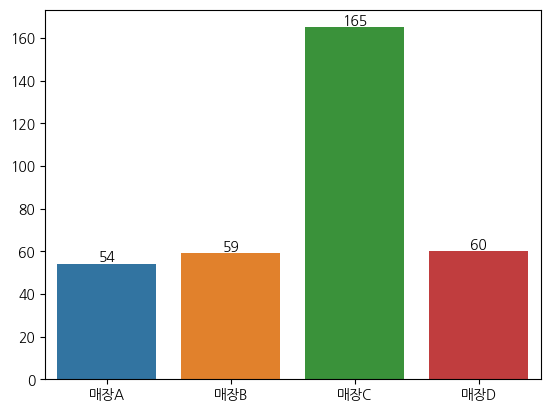

In [ ]:
index = ['매장A', '매장B', '매장C', '매장D']

ax = sns.barplot(index, vip_cnt)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), format(int(p.get_height()), ','), ha='center', va='bottom', fontsize=10)

In [ ]:
# 매장별 vip 회원 비율
a_cnt = df_join[df_join['구매매장']=='매장A']
b_cnt = df_join[df_join['구매매장']=='매장B']
c_cnt = df_join[df_join['구매매장']=='매장C']
d_cnt = df_join[df_join['구매매장']=='매장D']

cnt = []
cnt.append(a_cnt['회원번호'].nunique())
cnt.append(b_cnt['회원번호'].nunique())
cnt.append(c_cnt['회원번호'].nunique())
cnt.append(d_cnt['회원번호'].nunique())

vip_ratio = []

for i in range(4) :
    vip_ratio.append((vip_cnt[i]/cnt[i])*100)
    
vip_ratio

[2.0508925180402584,
 1.6244493392070485,
 2.9902138455962306,
 2.2865853658536586]

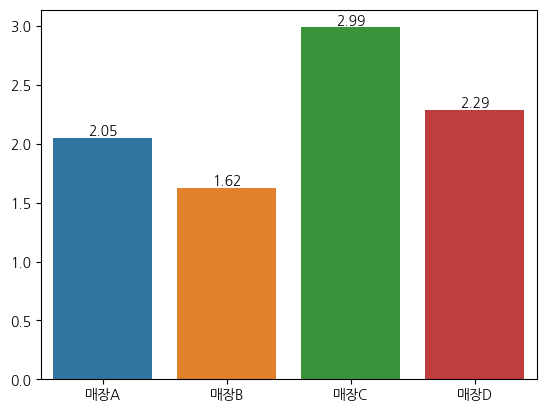

In [ ]:
ax = sns.barplot(index, vip_ratio)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), format(float(p.get_height()), '.2f'), ha='center', va='bottom', fontsize=10)

매장별 vip 회원의 비율을 비교해본 결과, C 매장이 가장 높게 나타났다.   
총 매출이 C 매장이 가장 높은 것을 고려했을 때, vip 회원 수의 영향으로 추측할 수 있다.   
    
- 따라서 vip 회원 수를 늘리는 판매 전략을 구상할 필요가 있다.

### VIP 회원 기준 파악

#### 가설 - 구매횟수에 따라 vip가 정해진다.
vip 중 최소 구매 횟수와 normal 중 최대 구매 횟수 비교   

In [ ]:
grouped = df_vip.groupby('회원번호')
avg_vip = grouped['공급일자'].nunique()
print('VIP 최소 구매 횟수 : ',avg_vip.min())

grouped = df_normal.groupby('회원번호')
avg_normal = grouped['공급일자'].nunique()
print('NORMAL 최대 구매 횟수 : ',avg_normal.max())

VIP 최소 구매 횟수 :  45
NORMAL 최대 구매 횟수 :  87


- 확인 결과, normal의 최대 구매 횟수가 VIP의 최소 구매 횟수 보다 더 많다.
- 따라서 구매횟수가 VIP의 선정 기준이라고 보기 어렵다.

#### 가설 - 총 구매금액에 따라 vip가 정해진다.
vip 중 최소 구매 금액과 normal 중 최대 구매 금액 비교

In [ ]:
grouped = df_vip.groupby('회원번호')
avg_vip = grouped['구매금액'].sum()
print('VIP 최소 총 구매금액 : ',avg_vip.min())

grouped = df_normal.groupby('회원번호')
avg_normal = grouped['구매금액'].sum()
print('NORMAL 최대 총 구매금액 : ',avg_normal.max())

VIP 최소 총 구매금액 :  443091
NORMAL 최대 총 구매금액 :  5575919


- 확인 결과, normal의 총 구매금액의 최댓값이 VIP 총 구매금액의 최소값 보다 더 크다.
- 따라서 구매금액이 VIP 선정 기준이라고 보기 어렵다.

#### 가설 - 최소 구매횟수와 최소 구매금액을 모두 만족해야 vip로 정해진다.

In [ ]:
grouped = df_vip.groupby('회원번호')
avg_vip = grouped[['공급일자']].nunique()
avg_vip['총 구매금액'] = grouped[['구매금액']].sum()
avg_vip.sort_values(by='공급일자')

,공급일자,총 구매금액
회원번호,,
116573504,45,654610
471674560,49,562651
762895808,53,605340
412174912,54,539293
597832448,54,1010714
...,...,...
86983296,168,5169819
38959296,168,2313909
381879424,170,9002241


In [ ]:
grouped = df_normal.groupby('회원번호')
avg_normal = grouped[['공급일자']].nunique()
avg_normal['총 구매금액'] = grouped[['구매금액']].sum()
avg_normal.sort_values(by='공급일자', ascending=False)

,공급일자,총 구매금액
회원번호,,
120849728,87,4418904
220954944,85,3140880
1390851136,85,2791900
43426688,84,1774183
1040081984,83,2147693
...,...,...
1219538624,1,41735
1219636992,1,2680
210639296,1,10146


normal 중 가장 많은 구매횟수를 가진 회원이 vip 중 가장 적은 구매횟수를 가진 회원보다 총 구매금액도 많다.   
이 가설 또한 기각한다.    
    
- 따라서, VIP 고객을 정하는 명확한 기준이 없다고 판단, 이를 구분할 기준이 필요하다. **-> RFM**

## EDA - 차수진
: 배송 서비스에 신청 여부에 따른 판매량 분석

### 배송서비스신청여부 유의미성 파악 
해당 회원이 구매 건당 소비한 총 금액을 확인하여 했는지 초기의 데이터에는 회원이 어떤걸 구매했는지 물건당 나와있으니 혹시 그 날 총 구매금액이 기준점을 넘기진 않았는지 확인 

In [ ]:
# 회원번호, 공급일자, 구매시각을 기준으로 그룹화하고, 각 그룹의 구매금액 합계를 계산
grouped = df_join.groupby(['회원번호', '공급일자', '구매시각', '배송서비스신청여부', '연령대'])['구매금액'].sum()

# 그룹별로 구매금액을 계산한 데이터프레임 생성
grouped_df = pd.DataFrame(grouped).reset_index()

# 일별 회원 방문 횟수 계산하여 추가
grouped_df['회원 일별 방문횟수'] = grouped_df.groupby(['회원번호', '공급일자'])['구매시각'].transform('size')

# 중복 제거를 위한 drop_duplicates() 적용
unique_visits_df = grouped_df.drop_duplicates(['회원번호', '공급일자'])

display(unique_visits_df)

,회원번호,공급일자,구매시각,배송서비스신청여부,연령대,구매금액,회원 일별 방문횟수
0,18613824,2022-07-03,2023-08-13 16:02:00,미신청,70대,21059,1
1,18764160,2022-01-22,2023-08-13 15:41:00,미신청,70대,0,1
2,18764160,2022-03-29,2023-08-13 16:55:00,미신청,70대,21059,1
3,18764160,2022-04-27,2023-08-13 18:58:00,미신청,70대,21059,1
4,18764160,2022-05-02,2023-08-13 12:40:00,미신청,70대,4595,1
...,...,...,...,...,...,...,...
158004,1670620864,2022-04-19,2023-08-13 16:51:00,미신청,90대이상,6700,3
158007,1670620864,2022-04-24,2023-08-13 13:36:00,미신청,90대이상,22973,2
158009,1670620864,2022-04-27,2023-08-13 10:15:00,미신청,90대이상,7657,2
158011,1670620864,2022-06-01,2023-08-13 18:02:00,미신청,90대이상,9955,1


### 검증 1. 배송서비스 신청한 사람의 총 구매금액(누적)
이 배송서비스 미신청자의 총 구매금액보다 높은가 ? 

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df_join.loc[df_join['배송서비스신청여부'] == '신청', '총구매금액'], label='신청')
sns.distplot(df_join.loc[df_join['배송서비스신청여부'] == '미신청', '총구매금액'], label='미신청')
plt.legend()
plt.show()
#배송서비스 신청한사람의 평균치가 전체적으로 총구매금액이 높음 그러나 미신청자의 구매금액도 어느정도 높은 편에 속함 
#따라서 해당 내용을 통해 알 수 있는게 그닥 없음 

### 검증 1 건당 구매금액에 대한 배송서비스 신청여부의 구매패턴은? 

In [ ]:
plt.figure(figsize=(10, 5))

# 구매금액 범위 설정
x_range = (0, 0.2*1e6)  # 원하는 범위로 조절

# 신청자와 미신청자의 구매금액 분포 시각화
sns.distplot(unique_visits_df.loc[unique_visits_df['배송서비스신청여부'] == '신청', '구매금액'], label='신청', hist=False, kde=True)
sns.distplot(unique_visits_df.loc[unique_visits_df['배송서비스신청여부'] == '미신청', '구매금액'], label='미신청', hist=False, kde=True)
plt.xlim(x_range)  # x 축 범위 설정
plt.legend()
plt.show()
## 그닥 차이 없음 

### 검증 2 배송서비스 신청자의 구매횟수가 미신청자보다 높은가 ? 

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df_join.loc[df_join['배송서비스신청여부'] == '신청', '구매횟수'], label='신청')
sns.distplot(df_join.loc[df_join['배송서비스신청여부'] == '미신청', '구매횟수'], label='미신청')
plt.legend()
plt.show()
# 신청자의 평균치가 미신청자보다 구매횟수가 높기는 하지만 구매신청횟수의 최대치 쪽을 본다면 배송서비스 미신청자가 몰려있음
# 따라서 배송서비스 신청자의 구매횟수가지고도 그닥 알 수 있는게 없음 

### 검증 2 배송서비스 신청자의 일일 방문

횟수가 미신청자보다 높은가 ? 

In [ ]:
plt.figure(figsize=(10, 5))
x_range = (0, 6)
sns.distplot(unique_visits_df.loc[unique_visits_df['배송서비스신청여부'] == '신청', '회원 일별 방문횟수'], label='신청', hist=False, kde=True)
sns.distplot(unique_visits_df.loc[unique_visits_df['배송서비스신청여부'] == '미신청', '회원 일별 방문횟수'], label='미신청', hist=False, kde=True)
plt.xlim(x_range)  # x 축 범위 설정
plt.legend()
plt.show()
## 유의미한 결과 없음 

### 검증 3 배송서비스의 신청은 건당 이루어지는가 ? 즉 동일 회원번호이더라도 해당 조건에 부합하면 서비스가 '신청'으로 뜨고 조건에 부합하지 않으면 '미신청'으로 뜨는가 ?
배송서비스는 구매금액이 많거나 고연령대를 대상으로 진행된다 적혀있는데  

In [ ]:
import pandas as pd

# 공급일자와 회원번호를 기준으로 그룹화하고, 각 그룹의 구매금액 합계를 계산
grouped = df_join.groupby(['공급일자', '회원번호']).agg({'구매금액': 'sum', '배송서비스신청여부': 'first'})

# 그룹별로 배송서비스 신청여부와 구매금액을 계산한 데이터프레임 생성
grouped_df = pd.DataFrame(grouped).reset_index()

# 배송서비스 신청여부에 따른 구매금액 분석
result = grouped_df.groupby(['배송서비스신청여부']).agg({'구매금액': ['mean', 'sum']})

display(result)


In [ ]:
## 동일 회원번호인데 배송서비스 신청과 미신청이 같이 있는 경우 print 해주어라 
for member_id in df_join['회원번호'].unique():
    member_records = grouped_df[grouped_df['회원번호'] == member_id]
    if ('신청' in member_records['배송서비스신청여부'].values) and ('미신청' in member_records['배송서비스신청여부'].values):
        print(f"회원번호: {member_id}")
        #display(member_records)
## 프린트 되는게 아무것도 없으므로 동일 회원번호는 신청과 미신청 중 하나만 가짐 
#즉 해당 아이디가 배송 조건에 부합되든 아니든 상관없이 같은 id면 신청과 미신청 중
#하나만 뜬다 // 즉 해당 데이터가 '신청'으로 뜨더라도 알 수 있는게 아무것도 없음 

### 추가 검증 - 혹시 연령대나 구매금액이 부합하는 건들이라서 싹다 신청으로 뜨는건 아닌지 

In [ ]:
## 미신청 고객 중 한명 출력 
df_join[df_join['회원번호']==247926336]

In [ ]:
## 연령대가 100세이면 고연령 > 그런데도 '미신청'으로 나옴 (조건에 부합하는데) 
df_join[df_join['회원번호']==1670620864].head()

In [ ]:
## 해당 회원이 각 날짜에 얼마만큼의 구매금액을 소비했는지
## 초기의 데이터에는 회원이 어떤걸 구매했는지 물건당 나와있으니 혹시 
#그 날 총 구매금액이 기준점을 넘기진 않았는지 확인 


import pandas as pd

# 회원번호와 공급일자를 기준으로 그룹화하고, 각 그룹의 구매금액 합계를 계산
grouped = df_join.groupby(['회원번호', '공급일자','배송서비스신청여부','연령대'])['구매금액'].sum()

# 그룹별로 구매금액을 계산한 데이터프레임 생성
grouped_df = pd.DataFrame(grouped).reset_index()

display(grouped_df)

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(unique_visits_df.loc[unique_visits_df['배송서비스신청여부'] == '신청', '구매금액'], label='신청')
sns.distplot(unique_visits_df.loc[unique_visits_df['배송서비스신청여부'] == '미신청', '구매금액'], label='미신청')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(unique_visits_df.loc[unique_visits_df['배송서비스신청여부'] == '신청', '회원 일별 방문횟수'], label='신청')
sns.distplot(unique_visits_df.loc[unique_visits_df['배송서비스신청여부'] == '미신청', '회원 일별 방문횟수'], label='미신청')
plt.legend()
plt.show()
# 신청자의 평균치가 미신청자보다 구매횟수가 높기는 하지만 구매신청횟수의 최대치 쪽을 본다면 배송서비스 미신청자가 몰려있음
# 따라서 배송서비스 신청자의 구매횟수가지고도 그닥 알 수 있는게 없음 

In [ ]:
display(grouped_df[grouped_df['회원번호']==247926336])

In [ ]:
display(grouped_df[grouped_df['회원번호']==743192512])
## 60대보다 연령대가 낮고, 구매금액이 7600원인 경우도 있지만 배송서비스는 신청으로 
#되어있음

In [ ]:
display(grouped_df[grouped_df['회원번호']==1670620864])

In [ ]:
## 20대는 연령대를 부합하지 않을테니 혹시 구매금액이 높아서 신청으로 떴는가 ? 
display(grouped_df[(grouped_df['연령대'] == '20대') & (grouped_df['배송서비스신청여부'] == '신청')])
## 그것도 아님.. 구매금액이 3733인데도 '신청'으로 뜸

In [ ]:
display(grouped_df[grouped_df['회원번호']==595597824])
## 미신청 20대와 비교 

In [ ]:
display(grouped_df[grouped_df['회원번호']==762608128])


## 따라서 연령대별로 찾아봤을 때 20대는 연령층이 낮은편에 속하므로 구매금액이 
#높아야 배송이 성립될텐데 3733원을 산 경우에도 배송서비스 신청은 신청으로 되어있음 
# 즉 배송서비스 신청여부 가지고는 실제 배송이 되었는지 알 수 있는게 없음 

In [ ]:
display(grouped_df[grouped_df['회원번호']==1670620864])

### 검증4  주소 - '구' 가 가깝다면 배송서비스 신청률이 더 높지 않을까 혹시 주소를 가지고 배송서비스의 신청을 받았는가? 

In [ ]:
df_join['구'].value_counts()

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_join, x='구', hue='배송서비스신청여부')
plt.legend()
plt.show()
## 그것도 아님 - 수지구여도 미신청이 뜨고 기타여도 신청이 뜸 

In [ ]:
## 해당 그래프 표로 출력 
pivot_table = df_join.pivot_table(index='구', columns='배송서비스신청여부', aggfunc='size', fill_value=0)

# 결과 출력
display(pivot_table)

### 검증 5 각 일자별 구매금액 평균으로 내서 한다면  혹시 유의있는 결과가 나올까 

In [ ]:
import pandas as pd

# 공급일자와 회원번호를 기준으로 그룹화하고, 각 그룹의 구매금액 합계를 계산
grouped = df_join.groupby(['공급일자', '회원번호']).agg({'구매금액': 'sum', '배송서비스신청여부': 'first'})

# 그룹별로 배송서비스 신청여부와 구매금액을 계산한 데이터프레임 생성
grouped_df = pd.DataFrame(grouped).reset_index()

# 배송서비스 신청여부에 따른 구매금액 분석
result = grouped_df.groupby(['배송서비스신청여부']).agg({'구매금액': ['mean', 'sum']})

display(result)

## 배송서비스 신청과 미신청의 평균 사이 신청의 평균치가 더 높기는 하나 그렇다고 해서
# 그것이 유의미하다고 말할 정도의 차이가 났는지는 의문. 


### 검증 6 배송서비스 신청 여부에 대해 연령대를 가지고 유의미한 결과를 얻을 수 있는가 

In [ ]:
age_group_counts = df_join.groupby(['연령대', '배송서비스신청여부']).size().unstack(fill_value=0)
age_group_counts['신청률'] = age_group_counts['신청'] / (age_group_counts['신청'] + age_group_counts['미신청'])
age = pd.DataFrame(age_group_counts)
# 결과 출력
display(age)
## 연령대를 가지고 봤을 때 90대이상 > 확신의 고령층 이지만 서비스 신청한 사람이 
#아무도 없음  
# 오히려 20대에서의 배송서비스 신청률이 높음 > 따라서 배송서비스 신청은 오프라인이 아닌 
#온라인을 통해 받기에 이러한 모바일기기에 익숙하지 못한 고연령대의 신청률이 떨어지고
#20대의 신청률이 높게 나오는 것이 아닌가 추측 

## 즉 전혀 고연령층을  타겟으로 한 배송서비스가 제대로 이루어지지 못하고 있음 

In [ ]:
# 그냥 위 코드 연령대별 신청률 표를 

#그래프화 한거 
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y='신청률', data=age_group_counts)
plt.title('연령대별 배송서비스 신청률')
plt.xlabel('연령대')
plt.ylabel('신청률')
plt.ylim(0, 1)  # Y축 범위 설정 (0부터 1까지)
plt.xticks(rotation=45)  # X축 라벨 회전
plt.tight_layout()  # 그래프 간격 조절
plt.show()

### 배송서비스 신청과 미신청한 사람의 연령대별 평균 구매금액 비교 

In [ ]:
# 20대 중에서 배송서비스를 신청한 사람과 신청하지 않은 사람을 구분하여 데이터프레임 생성
age_20s = df_join[df_join['연령대'] == '20대']
age_20s_with_delivery = age_20s[age_20s['배송서비스신청여부'] == '신청']
age_20s_without_delivery = age_20s[age_20s['배송서비스신청여부'] == '미신청']

# 구매금액 비교
mean_purchase_with_delivery = age_20s_with_delivery['구매금액'].mean()
mean_purchase_without_delivery = age_20s_without_delivery['구매금액'].mean()

print("20대 중에서 배송서비스를 신청한 사람의 평균 구매금액:", mean_purchase_with_delivery)
print("20대 중에서 배송서비스를 신청하지 않은 사람의 평균 구매금액:", mean_purchase_without_delivery)


In [ ]:
# 20대 중에서 배송서비스를 신청한 사람과 신청하지 않은 사람을 구분하여 데이터프레임 생성
age_20s = df_join[df_join['연령대'] == '30대']
age_20s_with_delivery = age_20s[age_20s['배송서비스신청여부'] == '신청']
age_20s_without_delivery = age_20s[age_20s['배송서비스신청여부'] == '미신청']

# 구매금액 비교
mean_purchase_with_delivery = age_20s_with_delivery['총구매금액'].mean()
mean_purchase_without_delivery = age_20s_without_delivery['총구매금액'].mean()

print("30대 중에서 배송서비스를 신청한 사람의 총 구매금액:", mean_purchase_with_delivery)
print("30대 중에서 배송서비스를 신청하지 않은 사람의 총 구매금액:", mean_purchase_without_delivery)


In [ ]:
# 20대 중에서 배송서비스를 신청한 사람과 신청하지 않은 사람을 구분하여 데이터프레임 생성
age_20s = df_join[df_join['연령대'] == '40대']
age_20s_with_delivery = age_20s[age_20s['배송서비스신청여부'] == '신청']
age_20s_without_delivery = age_20s[age_20s['배송서비스신청여부'] == '미신청']

# 구매금액 비교
mean_purchase_with_delivery = age_20s_with_delivery['구매금액'].mean()
mean_purchase_without_delivery = age_20s_without_delivery['구매금액'].mean()

print("40대 중에서 배송서비스를 신청한 사람의 평균 구매금액:", mean_purchase_with_delivery)
print("40대 중에서 배송서비스를 신청하지 않은 사람의 평균 구매금액:", mean_purchase_without_delivery)


In [ ]:
# 20대 중에서 배송서비스를 신청한 사람과 신청하지 않은 사람을 구분하여 데이터프레임 생성
age_20s = df_join[df_join['연령대'] == '50대']
age_20s_with_delivery = age_20s[age_20s['배송서비스신청여부'] == '신청']
age_20s_without_delivery = age_20s[age_20s['배송서비스신청여부'] == '미신청']

# 구매금액 비교
mean_purchase_with_delivery = age_20s_with_delivery['구매금액'].mean()
mean_purchase_without_delivery = age_20s_without_delivery['구매금액'].mean()

print("50대 중에서 배송서비스를 신청한 사람의 평균 구매금액:", mean_purchase_with_delivery)
print("50대 중에서 배송서비스를 신청하지 않은 사람의 평균 구매금액:", mean_purchase_without_delivery)


In [ ]:
# 20대 중에서 배송서비스를 신청한 사람과 신청하지 않은 사람을 구분하여 데이터프레임 생성
age_20s = df_join[df_join['연령대'] == '60대']
age_20s_with_delivery = age_20s[age_20s['배송서비스신청여부'] == '신청']
age_20s_without_delivery = age_20s[age_20s['배송서비스신청여부'] == '미신청']

# 구매금액 비교
mean_purchase_with_delivery = age_20s_with_delivery['구매금액'].mean()
mean_purchase_without_delivery = age_20s_without_delivery['구매금액'].mean()

print("60대 중에서 배송서비스를 신청한 사람의 평균 구매금액:", mean_purchase_with_delivery)
print("60대 중에서 배송서비스를 신청하지 않은 사람의 평균 구매금액:", mean_purchase_without_delivery)


In [ ]:
# 20대 중에서 배송서비스를 신청한 사람과 신청하지 않은 사람을 구분하여 데이터프레임 생성
age_20s = df_join[df_join['연령대'] == '70대']
age_20s_with_delivery = age_20s[age_20s['배송서비스신청여부'] == '신청']
age_20s_without_delivery = age_20s[age_20s['배송서비스신청여부'] == '미신청']

# 구매금액 비교
mean_purchase_with_delivery = age_20s_with_delivery['구매금액'].mean()
mean_purchase_without_delivery = age_20s_without_delivery['구매금액'].mean()

print("70대 중에서 배송서비스를 신청한 사람의 평균 구매금액:", mean_purchase_with_delivery)
print("70대 중에서 배송서비스를 신청하지 않은 사람의 평균 구매금액:", mean_purchase_without_delivery)


In [ ]:
# 20대 중에서 배송서비스를 신청한 사람과 신청하지 않은 사람을 구분하여 데이터프레임 생성
age_20s = df_join[df_join['연령대'] == '80대']
age_20s_with_delivery = age_20s[age_20s['배송서비스신청여부'] == '신청']
age_20s_without_delivery = age_20s[age_20s['배송서비스신청여부'] == '미신청']

# 구매금액 비교
mean_purchase_with_delivery = age_20s_with_delivery['구매금액'].mean()
mean_purchase_without_delivery = age_20s_without_delivery['구매금액'].mean()

print("80대 중에서 배송서비스를 신청한 사람의 평균 구매금액:", mean_purchase_with_delivery)
print("80대 중에서 배송서비스를 신청하지 않은 사람의 평균 구매금액:", mean_purchase_without_delivery)


### 배송서비스 신청과 미신청의 평균 구매금액이 30~80대까지 신청자가 미신청보다 평균 구매금액이 높게 나오기는 했지만 이들의 평균 구매금액 차이가 그다지 유의미할 정도로 크게 나오지 않았고, 오히려 20대는 미신청자의 평균 구매금액이 높게 나옴 

### 검증7 배송서비스 신청을 한 사람이 모바일 알람을 신청하지 않았을까 

In [ ]:
import pandas as pd

# 배송서비스신청여부와 모바일알람신청여부에 대한 교차표 생성
cross_table = pd.crosstab(df_join['배송서비스신청여부'], df_join['모바일알람여부'])

# 교차표 출력
display(cross_table)
## 배송서비스를 신청한 사람과 모바일알람을 신청한 사람 간에는 그닥 연관성이 없음. 

### 검증 7 배송서비스 신청을 한 사람의 등급이 VIP일까 혹시 ? VIP를 위주로 배송서비스가 진행이 되었나 ? 

In [ ]:
import pandas as pd

# 배송서비스신청여부와 멤버등급에 대한 교차표 생성
cross_table = pd.crosstab(df_join['배송서비스신청여부'], df_join['Gold_member'])

# 교차표 출력
display(cross_table)
## 배송서비스를 신청한 사람과 Gold_member간에는 연관성이 없음 엥????

In [ ]:
## VIP의 연령대 파악 
vip_age_distribution = df_join[df_join['Gold_member'] == 'VIP']['연령대'].value_counts()

# 결과 출력
print(vip_age_distribution)
## 오히려 고연령대를 대상으로 진행됨 

In [ ]:
age_purchase_total = df_join.groupby('연령대')['총구매금액'].sum()

# 결과 출력
display(age_purchase_total)

### 검증 8 매장별로 배송서비스 알림 여부가 다른가 ? 

In [ ]:
count_cross_table = pd.crosstab(index=[df_join['구매매장']], columns=df_join['배송서비스신청여부'], values=df_join['회원번호'], aggfunc='count')

# 각 매장별로 수신률 계산
cross_table = count_cross_table.copy()
cross_table['신청률(%)'] = (cross_table['신청'] / (cross_table['신청'] + cross_table['미신청'])) * 100

# 표 형태로 출력
display(cross_table)
## 매장별로 신청률 비슷 ,, 매장이 어디냐도 배송서비스에 그닥 영향력 안줌 

In [ ]:
##  분석 결과 

#배송서비스 신청한사람의 평균치가 전체적으로 총구매금액이 높음 그러나 미신청자의 구매금액도 어느정도 높은 편에 속함 

# 배송서비스 신청자의 구매횟수가지고도 그닥 알 수 있는게 없음 (신청자의 평균치가 미신청자보다 구매횟수가 높기는 하지만 
#구매신청횟수의 최대치 쪽을 본다면 배송서비스 미신청자가 몰려있음)


#배송서비스는 구매금액이 많거나 연령대가 고령층을 대상으로 진행된다 적혀있으나 같은 회원번호인 경우라면 배송서비스 신청은 
#건당 x 동일 회원번호라면 해당 조건에 부합하는지 상관없이 무조건 신청 아님 미신청으로 뜸 


## 연령대별로 찾아봤을 때 20대는 연령층이 낮은편에 속하므로 구매금액이 높아야 배송이 성립될텐데 3733원을 산 경우에도 배송서비스 
#신청은 신청으로 되어있음 = 배송서비스 신청여부 가지고는 실제 배송이 되었는지 알 수 있는게 없음 

## 배송서비스 신청여부에 따라 구매금액은 mean 21130.87, 신청 26857.32로 나오지만 이렇다고 해서 그사람의 총 구매금액을 가지고 
#따지는건 아닌듯함 

# 주소 - '구' 가 가깝다면 배송서비스 신청률이 더 높지 않을까 싶었는데 그것도 아님 .
 

## 연령대를 가지고 봤을 때 90대이상 > 고령층 이지만 서비스 신청한 사람이 아무도 없음 > 오히려 20대에서의 배송서비스 신청률이 
#높음 > 즉 배송서비스 신청은 오프라인이 아닌 온라인을 통해 받을 것으로 생각 

## 멤버 등급과 배송서비스 상관관계 파악 > vip는 싹다 배송서비스 미신청임 why? 심지어 VIP는 40~90대 이상으로 30대이하는 속하지 
#않는데도...

## 배송서비스 알림과 모바일알림 서비스를 신청했냐는 그닥 연관성이 없음 

## VIP는 왜 연령대가 높은데 배송서비스 알림을 신청하지 않았는가? 